In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

In [1]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [2]:
# import data_analysis_function

In [3]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [4]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [2]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal

from dataset_analysis import check_A_B_blast_furnace
from dataset_analysis import no_zero_value_in_target

from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [3]:
from dataset_analysis import remove_rw_column_1

In [4]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [5]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
# print(type(correlation_threshold_min_value))
print(correlation_threshold_max_value)
print(correlation_threshold_min_value)

0.9
0.5


In [6]:
initial_dataframe = create_dataframe(filepath_server)

In [87]:
def create_dateTime(dataframe):
    dataframe = dataframe.sort_index()
    dataframe['dateTime'] = pd.to_datetime(dataframe['longTime'], unit='ms')
    dataframe = dataframe.drop(['longTime'], axis=1)
    try:
        dataframe.drop(['row ID'], axis = 1)
    except:
        None
    
    return dataframe


df_1 = create_dateTime(initial_dataframe)

In [89]:
def distinct_month_1(dataframe, target_column,month_key):
    array_df = []
    for i in month_key:
        req_data_1=dataframe.loc[(dataframe[target_column]==i)]
        req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
        
        array_df.append(req_frame_1)
    
    return array_df

In [90]:
def draw_month(month_key_value, dict_of_month,target_column):
    for i in month_key_value:
        value = dict_of_month[i]
        value.iloc[:].plot(y=[target_column])
        plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
        plt.xlabel('range')
        plt.ylabel('value')

        plt.rcParams['figure.figsize'] = (5,5)
        plt.savefig(str(i) + '.jpg')
        plt.show()

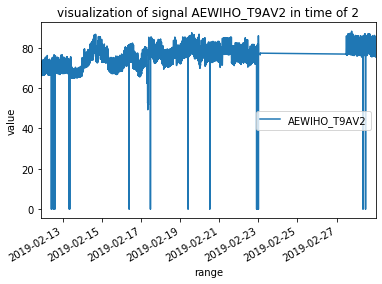

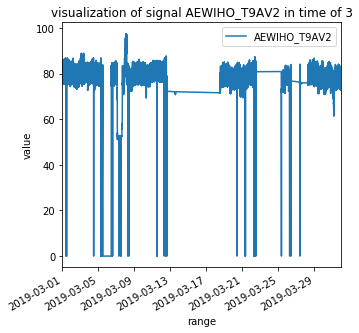

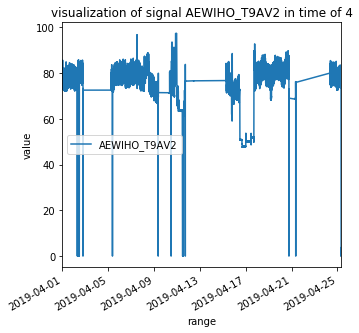

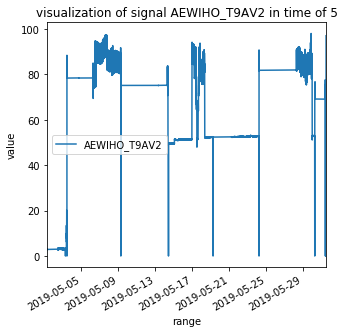

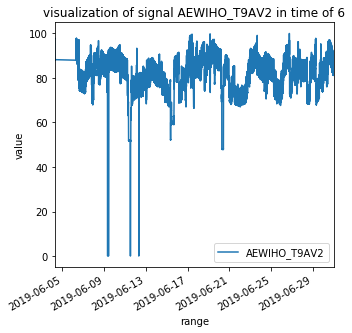

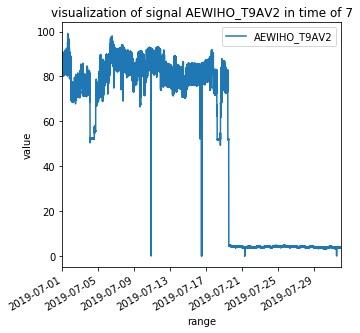

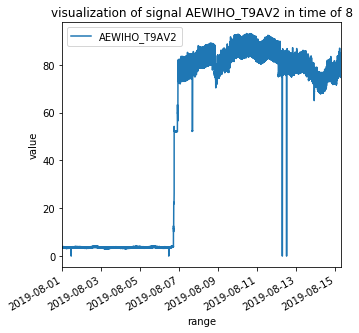

In [10]:
# df_2 = df_1.copy()
# df_2 = df_2.set_index('dateTime')

def create_month(dataframe, target_column_month):
    dataframe = dataframe.set_index('dateTime')
    dataframe['year'] = pd.DatetimeIndex(dataframe.index).year
    dataframe['month'] = pd.DatetimeIndex(dataframe.index).month
    
    dict_of_month = {k:v for k,v in dataframe.groupby('month')}
    month_key_value = collections.OrderedDict(dict_of_month)
    
    month_array_df = distinct_month_1(dataframe, target_column_month, month_key_value)
    
    draw_month_fig = draw_month(month_key_value, dict_of_month, target_column)
    
    return dataframe, month_array_df

date_df, month_array_df = create_month(df_1, 'month')

In [11]:
def specific_month_df(dataframe,target_column_month):
    req_data_month=dataframe.loc[(dataframe[target_column_month]==2) | (dataframe[target_column_month]==3) ]
    req_frame_month=pd.DataFrame(req_data_month,columns=dataframe.columns)
    
    return req_frame_month

specific_month_df = specific_month_df(date_df,'month')

In [91]:
print(date_df.shape)
print(specific_month_df.shape)

(186100, 4240)
(45128, 4240)


In [99]:
def drop_month_year(dataframe):
#     dataframe = dataframe.drop(['year','month'], axis=1)
    dataframe = dataframe.reset_index()
    return dataframe

spec_month = drop_month_year(specific_month_df)

In [100]:
print(spec_month.shape)

(45128, 4241)


In [101]:
spec_month.head(2)

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0 2019-03-31 23:59:00     68.800616     38.813747     92.134679     31.640239   
1 2019-03-31 23:58:00     71.799463     46.388546     91.813585     30.635985   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
0     55.709343     89.382264     93.755293     25.978776     72.473868  ...   
1     55.709343     89.382264     93.714470     28.573610     72.473868  ...   

   RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
0     41.687065     37.582423     79.148815     75.633611     68.747738   
1     41.687065     37.524301     79.092552     75.611684     68.382080   

   RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  month  
0     66.438534      0.678688     12.421052  2019      3  
1     66.390368      0.679430     11.903316  2019      3  

[2 rows x 4241 columns]

In [102]:
# df_2.columns.get_loc(target_column)
# print(df_2.columns[4142])
# target_df = df_2.loc[:, df_2.columns[4142]]

In [103]:
# targ = pd.DataFrame(target_df)

In [104]:
# df_month = pd.DataFrame(index=df_2.index)

In [105]:
# df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [106]:
# df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [107]:
# df_month

In [108]:
# df_month_final = pd.concat([df_month, target_df], axis=1)
# df_month_final.head()

In [109]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [110]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(186100, 4239)


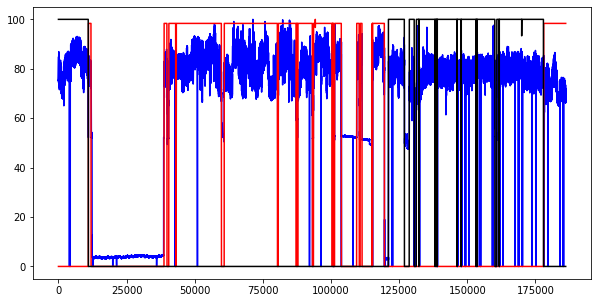

In [30]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [13]:
# test_new = conversion_timestamp_to_unixtime(initial_dataframe)

In [111]:
test_new = spec_month

In [112]:
# test_new_1 = test_new.drop(['row ID'], axis = 1) # need it if dataset made fro KNIME using ROW_ID
test_new_1 = test_new

In [113]:
# test_new_2 = remove_rw_column_1(test_new_1,'RW')
test_new_2 = test_new_1

In [114]:
test_new_2.shape
# test_new_2.shape[0]

(45128, 4241)

In [115]:

# Taking define number of row from the beginning
# multivariate_data = alter_time(test_new_2, start_pos, test_new.shape[0])
multivariate_data = alter_time(test_new_2, start_pos,test_new_2.shape[0])

In [116]:
multivariate_data.head(2)

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
45127 2019-02-11 20:57:00     72.030143     28.019753     90.988125   
45126 2019-02-11 20:58:00     72.030143     37.870419     90.988125   

       AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  \
45127     25.369044     92.387543     90.208292     93.674403     10.971169   
45126     34.451579     88.177774     90.449495     93.353135     18.897334   

       AEAGHOAWE3T1  ...  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  \
45127     51.916376  ...     41.687065     39.000517     77.532654   
45126     51.451800  ...     41.687065     39.195484     77.545509   

       RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  \
45127     75.407204     64.213670     57.013879      0.658391     19.815859   
45126     75.505091     64.437859     56.966760      0.659977     20.066390   

       year  month  
45127  2019      2  
45126  2019      2  

[2 rows x 4241 columns]

In [117]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [118]:
print(type(multivariate_data), multivariate_data.shape)
print(type(rearranged_dataframe), rearranged_dataframe.shape)

<class 'pandas.core.frame.DataFrame'> (45128, 4241)
<class 'pandas.core.frame.DataFrame'> (45128, 4241)


In [119]:
def check_A_B_blast_furnace_1(dataframe,furnace_signal_column_a,value_A, furnace_signal_column_b,value_B):
    req_data=dataframe.loc[(dataframe[furnace_signal_column_a]>=value_A) | (dataframe[furnace_signal_column_b]>=value_B)]
    req_frame=pd.DataFrame(req_data,columns=dataframe.columns)
    
    return req_frame

dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace_1(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [120]:
def no_zero_value_in_target_1(dataframe, target_column, req_drop_value_target):
    req_data_1=dataframe.loc[(dataframe[target_column]!=req_drop_value_target)]
    req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
    
    return req_frame_1

dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [33]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

In [121]:
dataframe_no_zero_value_target_column.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
year                     int64
AEWIHO_T9AV2           float64
Length: 4241, dtype: object

In [122]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)
print(dataframe_no_zero_value_target_column.shape)

(45128, 4241)
(44355, 4241)
(44229, 4241)


In [123]:
dataframe_no_zero_value_target_column.tail(2)

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
1 2019-03-31 23:58:00     71.799463     46.388546     91.813585     30.635985   
0 2019-03-31 23:59:00     68.800616     38.813747     92.134679     31.640239   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
1     55.709343     89.382264     93.714470     28.573610     72.473868  ...   
0     55.709343     89.382264     93.755293     25.978776     72.473868  ...   

   RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
1     41.687065     37.524301     79.092552     75.611684     68.382080   
0     41.687065     37.582423     79.148815     75.633611     68.747738   

   RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  AEWIHO_T9AV2  
1     66.390368      0.679430     11.903316  2019     73.498997  
0     66.438534      0.678688     12.421052  2019     74.459244  

[2 rows x 4241 columns]

In [124]:
dataframe_no_zero_value_target_column_1 = dataframe_no_zero_value_target_column.reset_index()
dataframe_no_zero_value_target_column_2 = dataframe_no_zero_value_target_column_1.drop(['index'], axis=1)
print(dataframe_no_zero_value_target_column_2.shape)
dataframe_no_zero_value_target_column_2.head(2)

(44229, 4241)


dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0 2019-02-11 20:57:00     72.030143     28.019753     90.988125     25.369044   
1 2019-02-11 20:58:00     72.030143     37.870419     90.988125     34.451579   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
0     92.387543     90.208292     93.674403     10.971169     51.916376  ...   
1     88.177774     90.449495     93.353135     18.897334     51.451800  ...   

   RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
0     41.687065     39.000517     77.532654     75.407204     64.213670   
1     41.687065     39.195484     77.545509     75.505091     64.437859   

   RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  AEWIHO_T9AV2  
0     57.013879      0.658391     19.815859  2019     66.387058  
1     56.966760      0.659977     20.066390  2019     66.765225  

[2 rows x 4241 columns]

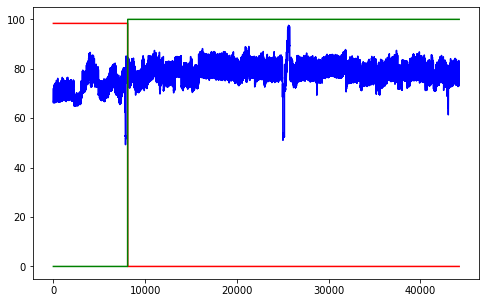

In [127]:
plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [128]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column_2)

In [129]:
nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [130]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [131]:
print(type(dataframe_drop_column_with_same_value))
print(dataframe_drop_column_with_same_value.shape)
dataframe_drop_column_with_same_value.head(1)

<class 'pandas.core.frame.DataFrame'>
(44229, 2923)


dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0 2019-02-11 20:57:00     72.030143     28.019753     90.988125     25.369044   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
0     92.387543     90.208292     93.674403     10.971169     51.916376  ...   

   RWWIHOUT10V0  RWWIHOT7_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  \
0       0.44299     83.229109     39.000517     77.532654     75.407204   

   RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  AEWIHO_T9AV2  
0      64.21367     57.013879      0.658391     19.815859     66.387058  

[1 rows x 2923 columns]

In [132]:
dataframe_drop_column_with_same_value.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2923, dtype: object

In [ ]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [133]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [134]:
dataframe_no_string.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2923, dtype: object

In [46]:
# def remove_rw_column_1(dataframe,req_string):
#     print(req_string)
#     new_variable = []
#     for i in dataframe:
#         x = i[:2]
#         if x != req_string:
#             new_variable = np.append(new_variable, i)
    
#     dataframe = dataframe.iloc[:][new_variable]
#     return dataframe

In [47]:
# no_DE = remove_rw_column_1(dataframe_no_string,'DE')

In [48]:
# no_CW = remove_rw_column_1(no_DE,'CW')

In [40]:
# dataframe_drop_row_consecutive_same_value = drop_row(dataframe_no_string)

In [135]:
print(dataframe_no_string.shape)
# print(no_DE.shape)
# print(no_CW.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)

(44229, 2923)


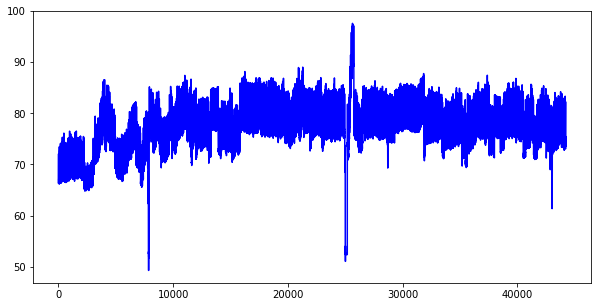

In [137]:
plt.plot(dataframe_no_string[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [139]:
# Make dataframe with dateTime index
def dataframe_datetime(dataframe):
    dataframe_datetime = dataframe.set_index('dateTime')
    return dataframe_datetime

dataframe_datetime = dataframe_datetime(dataframe_no_string)

In [45]:
# dataframe_datetime = dataframe_datetime.drop(['longTime'], axis = 1)

In [140]:
dataframe_datetime.shape

(44229, 2922)

In [141]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [142]:
# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [143]:
correlation_csv = main_correlation.to_csv('high_correlation.csv')

In [144]:
dataframe_datetime.to_csv('dataframe_datetime.csv')

In [49]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [50]:
print(dataframe_high_correlation.shape)
dataframe_high_correlation.describe()

(44194, 13)


DEDATK_206I0  AEDAHO_T9_V2  AEDAKWM1OFF0  AEDAKWM2OFF0  AEDAKWM3OFF0  \
count  44194.000000  44194.000000  44194.000000  44194.000000  44194.000000   
mean      77.329205     69.219768     81.447708     39.717395     81.447708   
std       40.327582      8.852253     38.872559     18.981301     38.872559   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       98.360656     66.007777    100.000000     48.583015    100.000000   
50%       98.360656     70.732847    100.000000     48.583015    100.000000   
75%       98.360656     74.520891    100.000000     48.583015    100.000000   
max       98.360656     98.973455    100.000000    100.000000    100.000000   

       AEDAKW80SWP0  AEDAKWK1SWP0  AEDAKWK2SWP0  AEDAKWK3SWP0  DEWIHOBT9_I0  \
count  44194.000000  44194.000000  44194.000000  44194.000000  44194.000000   
mean      81.435673     80.607799     80.607797     80.607724     81.703399   
std       38.866967     38.471788     38.471787     38.471765     38.664303   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      100.000000     98.958329     98.958329     98.958329    100.000000   
50%      100.000000     98.958329     98.958329     98.958329    100.000000   
75%      100.000000     98.958329     98.958329     98.958329    100.000000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

       AEWIGHG9__P0  AEWIGHG9__T0  AEWIHO_T9AV2  
count  44194.000000  44194.000000  44194.000000  
mean      81.797404     77.734816     75.280789  
std        9.167659      6.017412      4.469114  
min        6.634424     36.106251     49.287694  
25%       78.206109     75.145924     73.373869  
50%       83.986482     78.941724     75.567790  
75%       88.125992     81.816093     77.010940  
max      100.000000     91.486047     97.591043

In [ ]:
multivariate_column_label = ['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94


In [86]:
# for i in dataframe_high_correlation:
#     plt.plot(dataframe_high_correlation[i])
#     plt.title(str(i))
#     plt.show()
    
    
#     # plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])

In [119]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [55]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder  has already created


In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [ ]:
# def make_dataset(dataframe):
#     dataset = np.array(dataframe)
#     NumberOfElements = int(len(dataset) * 0.99)
#     print('Number of Elements for training: ', NumberOfElements)
#     print('dataset length: ', len(dataset))

#     train_input = dataset[0:NumberOfElements, 0:-1]
#     print('train_input shape: ', train_input.shape)
#     train_output = dataset[0:NumberOfElements, -1]
#     print('train_output shape: ', train_output.shape)

#     test_input = dataset[NumberOfElements:len(dataset), 0:-1]
#     print('test_input shape: ', test_input.shape)
#     test_output = dataset[NumberOfElements:len(dataset), -1]
#     print('test_output shape: ', test_output.shape)

#     return train_input, train_output, test_input, test_output

In [57]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation,0.99)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

Number of Elements for training:  43752
dataset length:  44194
train_input shape:  (43752, 12)
train_output shape:  (43752,)
test_input shape:  (442, 12)
test_output shape:  (442,)


In [58]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file removed and created


------- LinearRegression


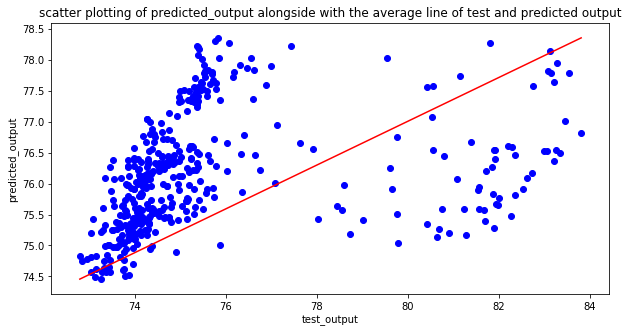

<class 'numpy.ndarray'>


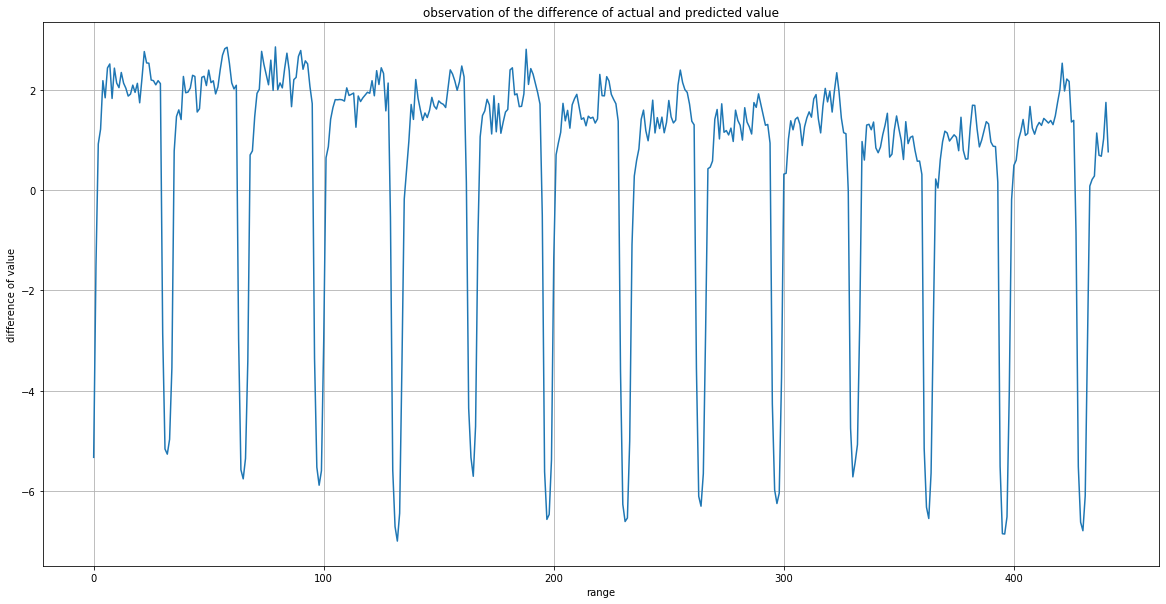

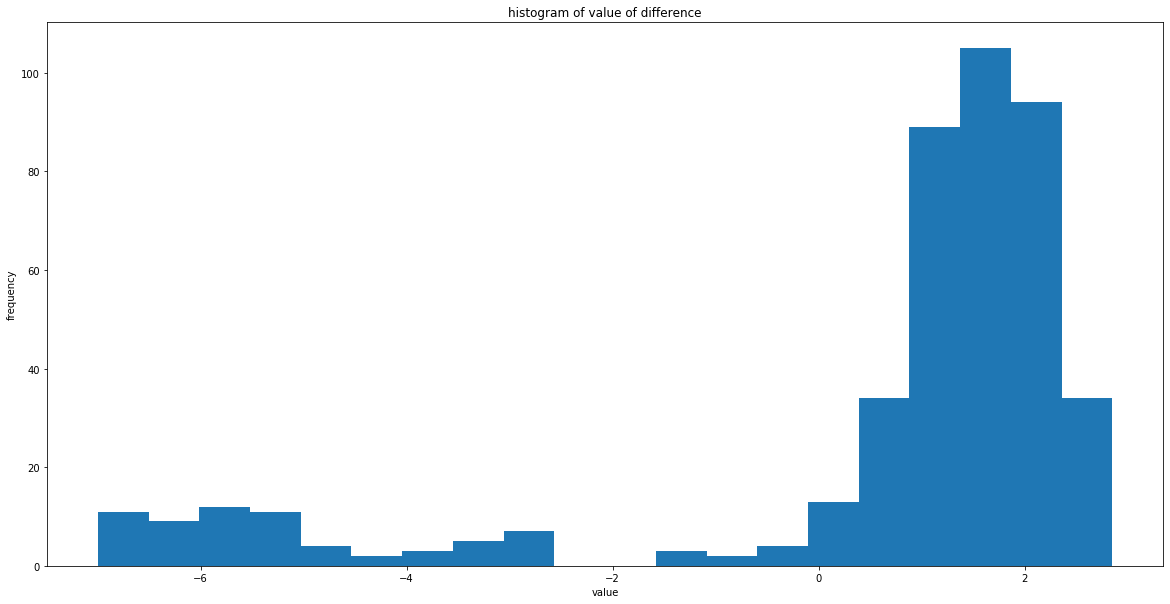

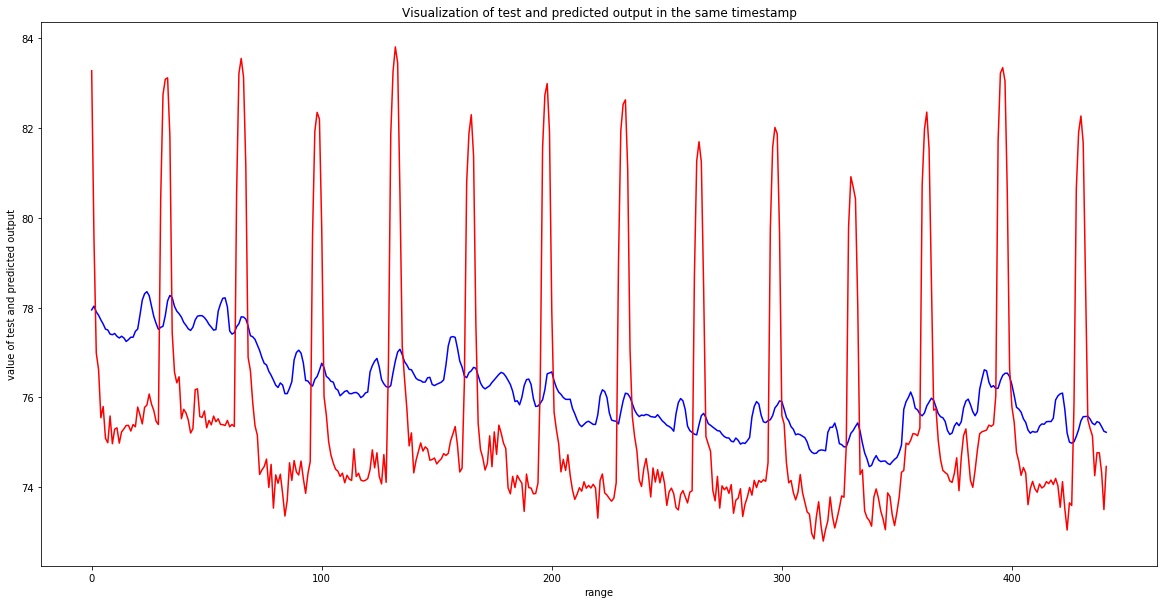

r_2 statistic: 0.06
Mean_absolute_error: 2.08
Mean squared error: 6.52
RMSE:  2.5529793581513216
!!!!---------------!!!!----------------!!!!
------- Lasso


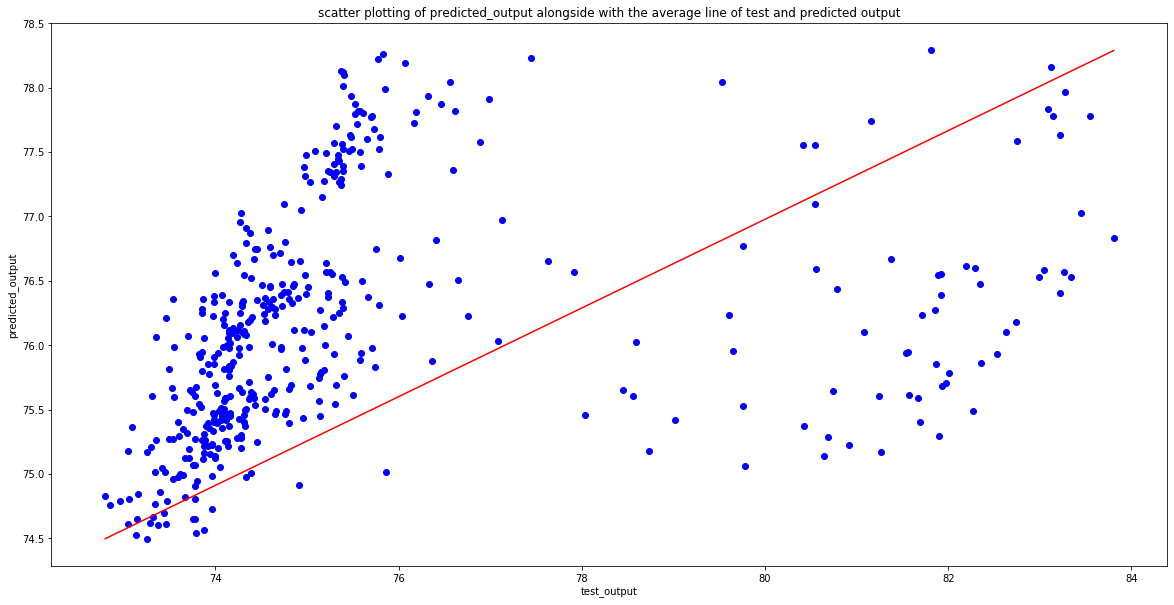

<class 'numpy.ndarray'>


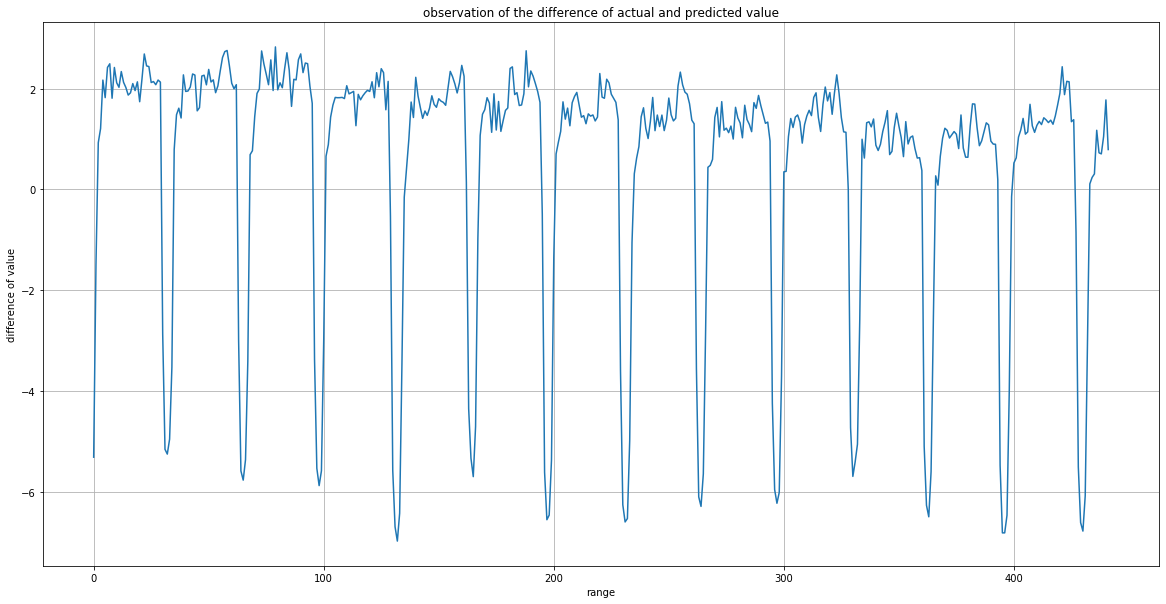

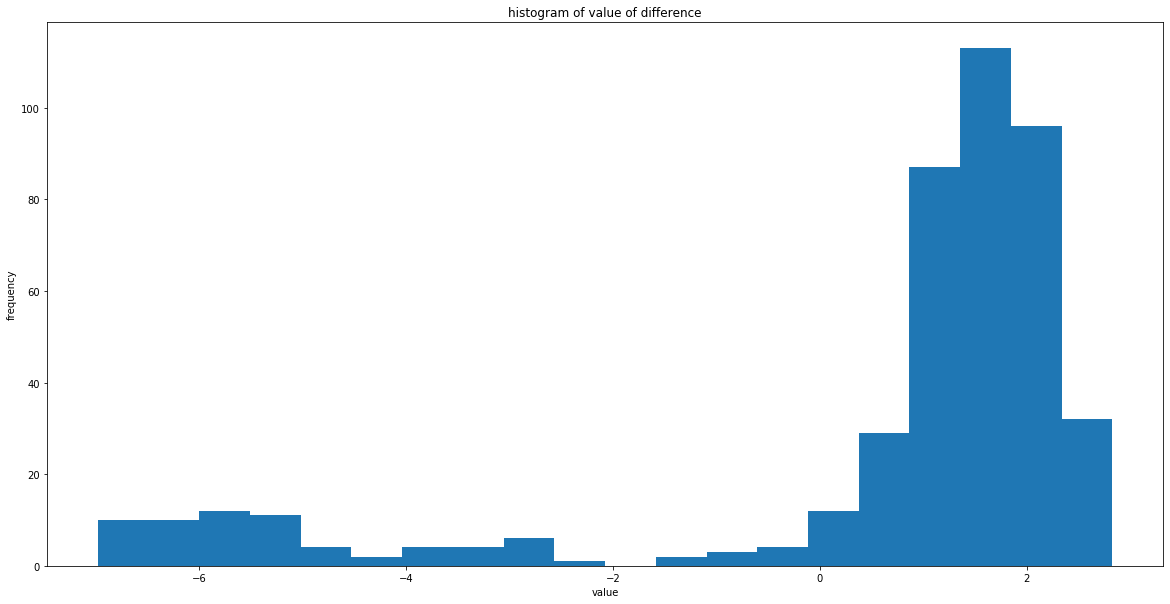

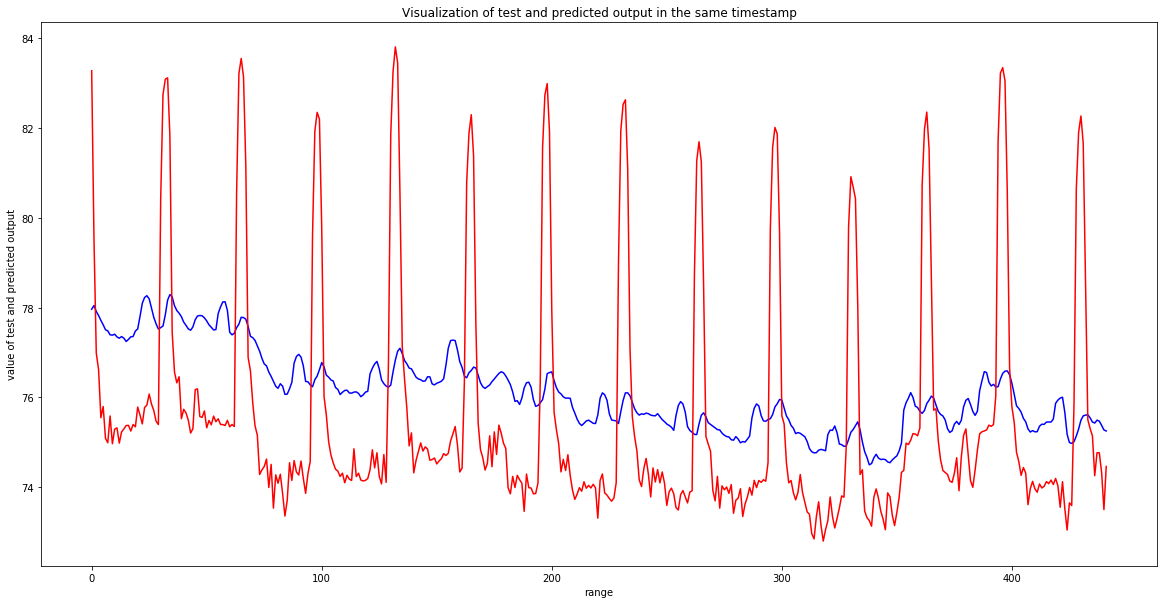

r_2 statistic: 0.06
Mean_absolute_error: 2.08
Mean squared error: 6.48
RMSE:  2.544767161830072
!!!!---------------!!!!----------------!!!!
------- Ridge


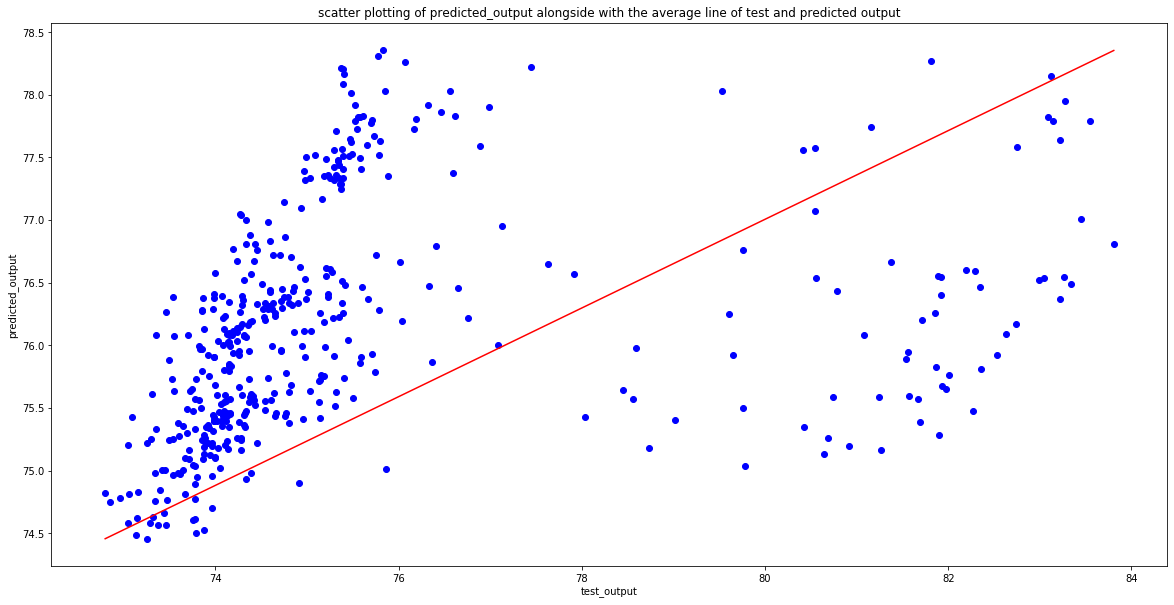

<class 'numpy.ndarray'>


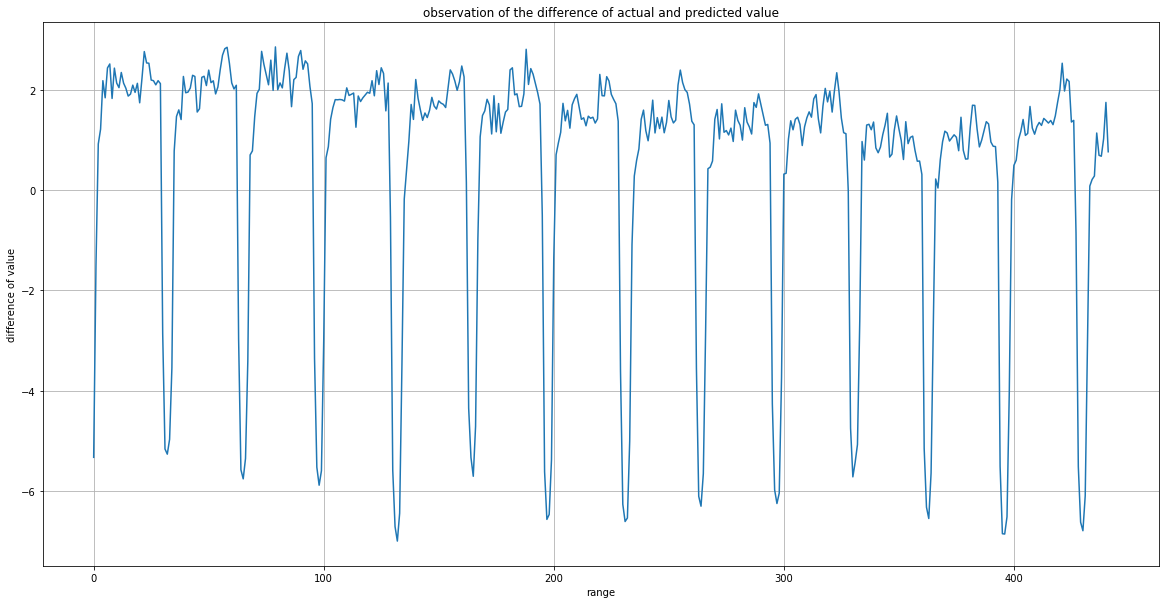

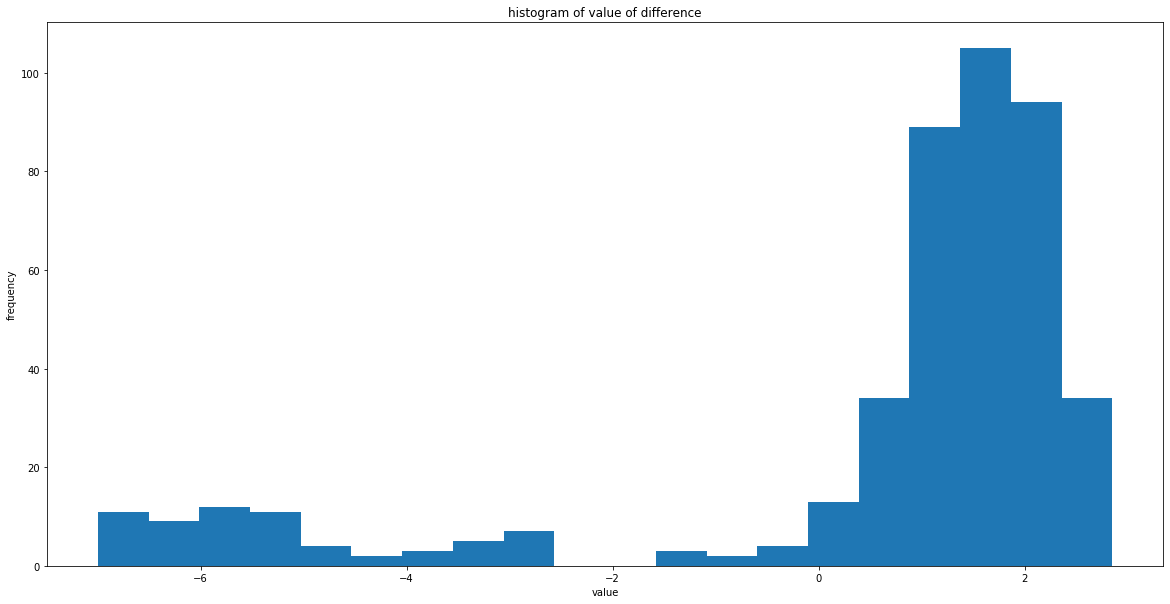

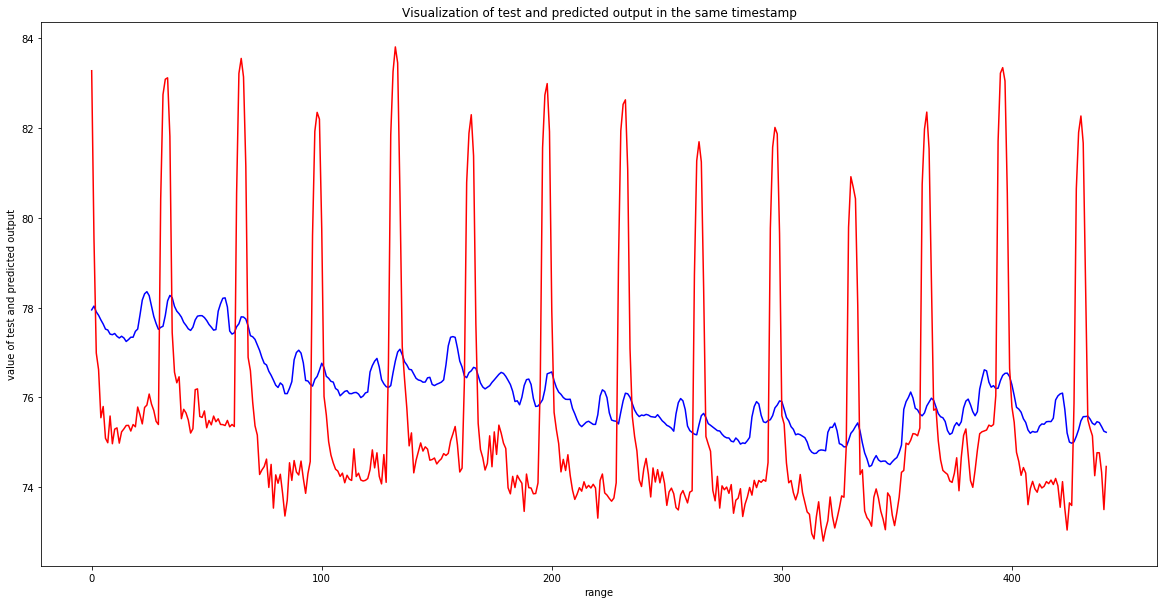

r_2 statistic: 0.06
Mean_absolute_error: 2.08
Mean squared error: 6.52
RMSE:  2.5529410554436427
!!!!---------------!!!!----------------!!!!
------- BayesianRidge


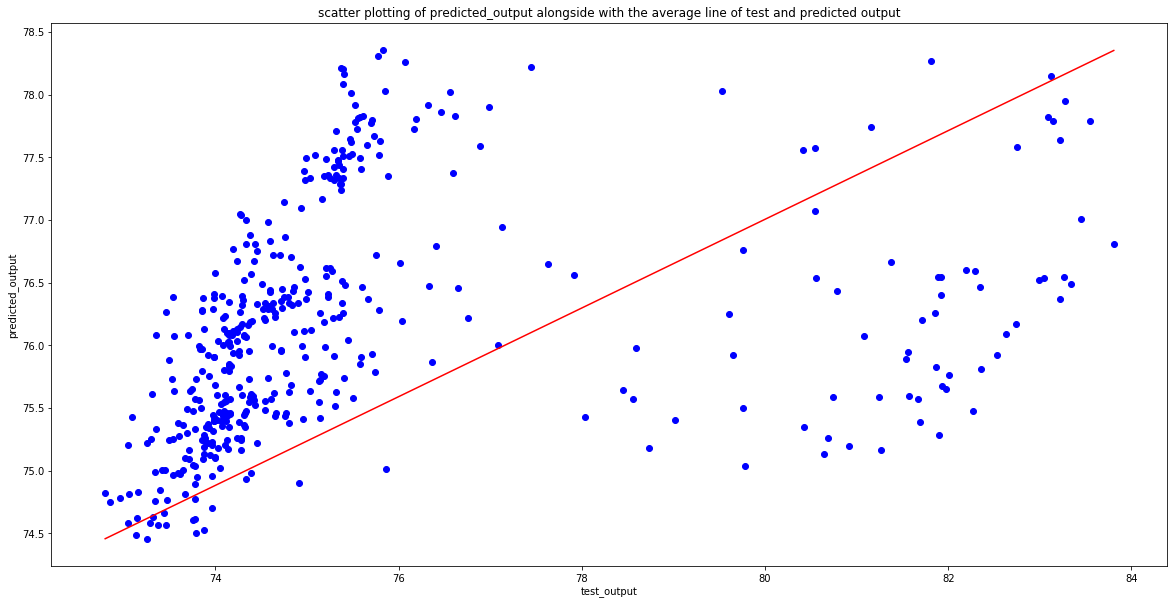

<class 'numpy.ndarray'>


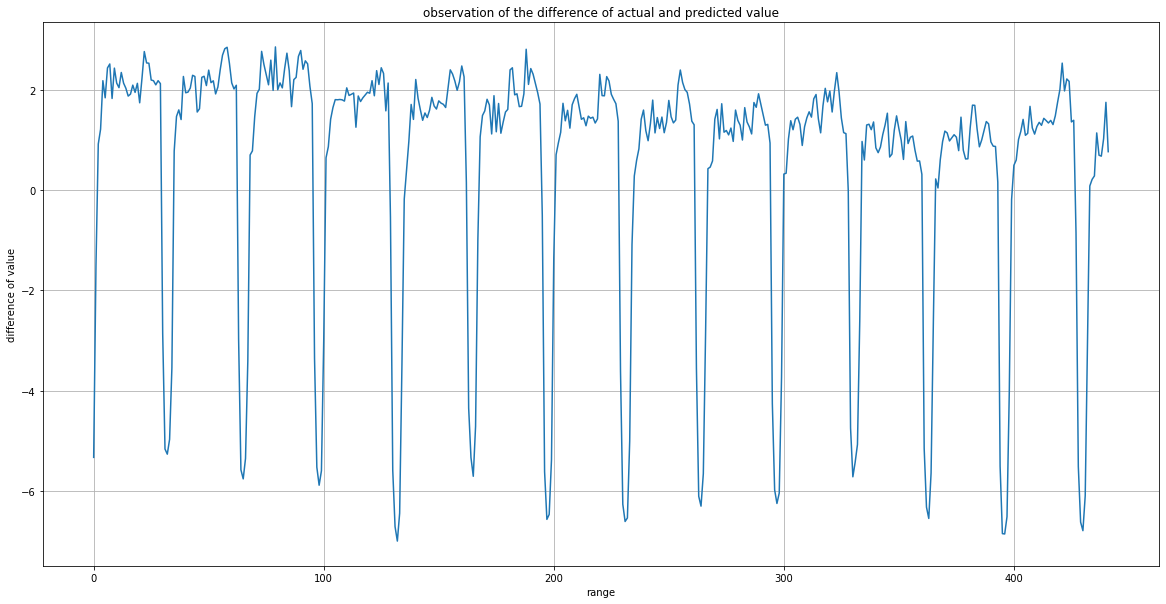

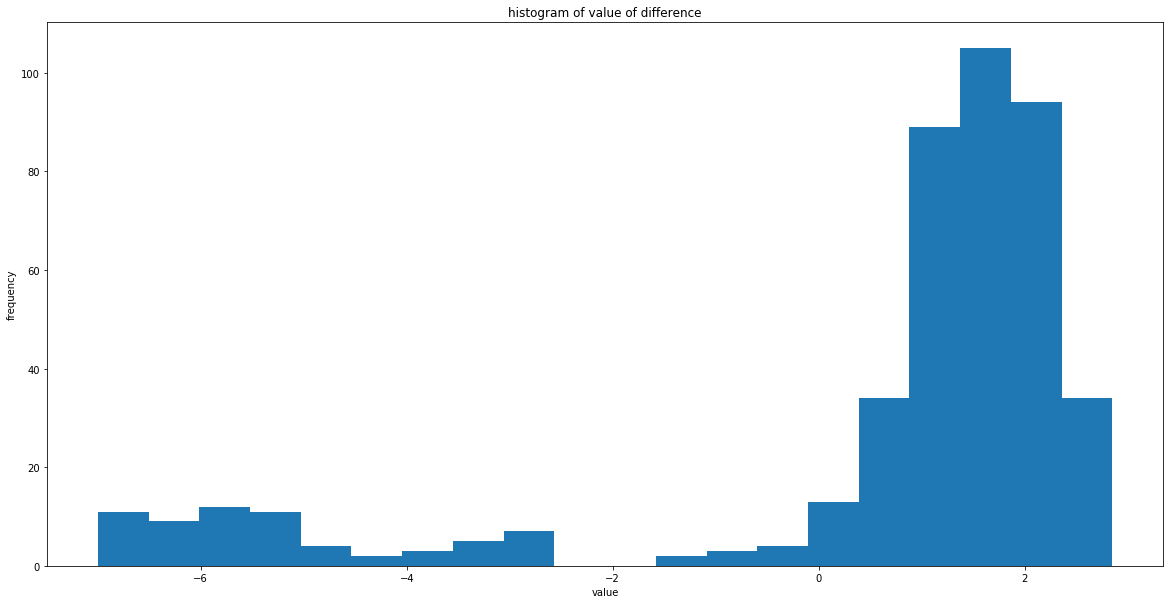

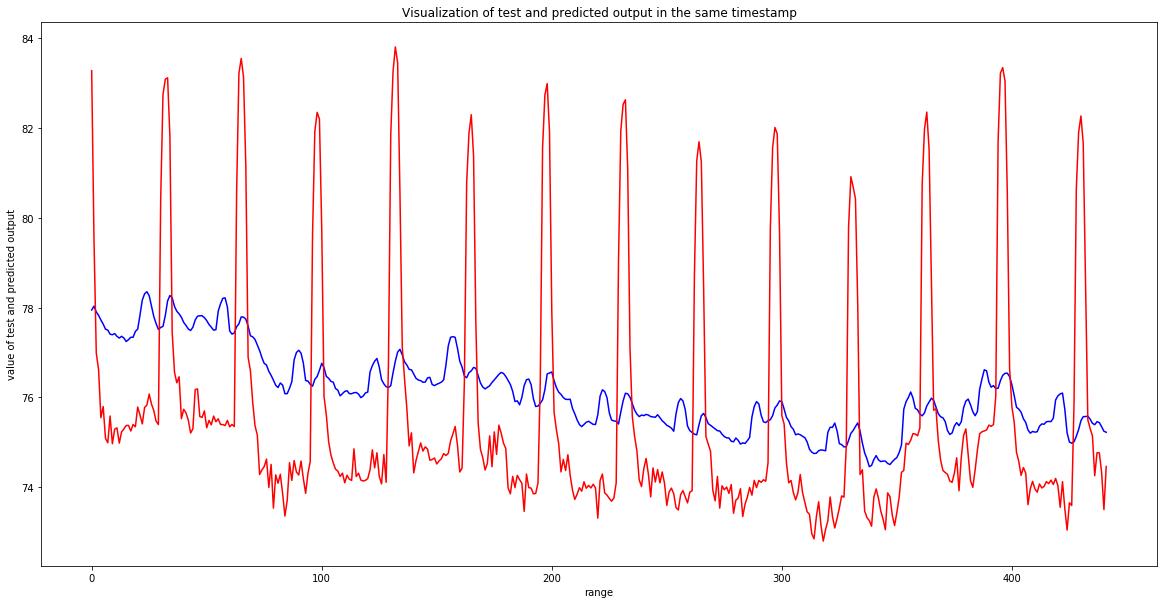

r_2 statistic: 0.06
Mean_absolute_error: 2.08
Mean squared error: 6.52
RMSE:  2.552871334907987
!!!!---------------!!!!----------------!!!!
------- tree


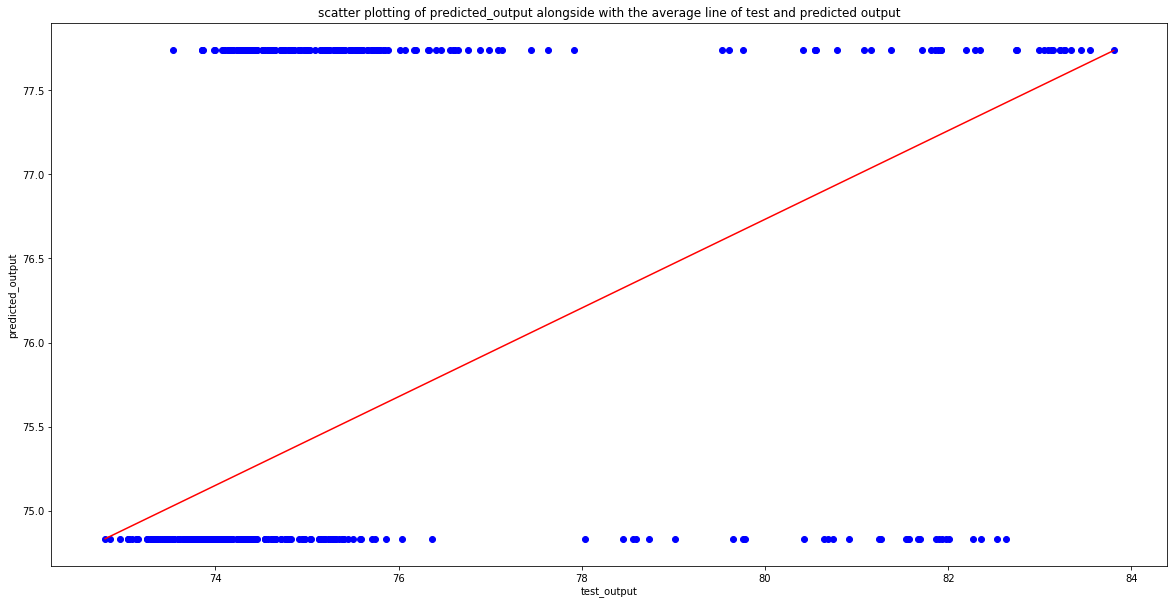

<class 'numpy.ndarray'>


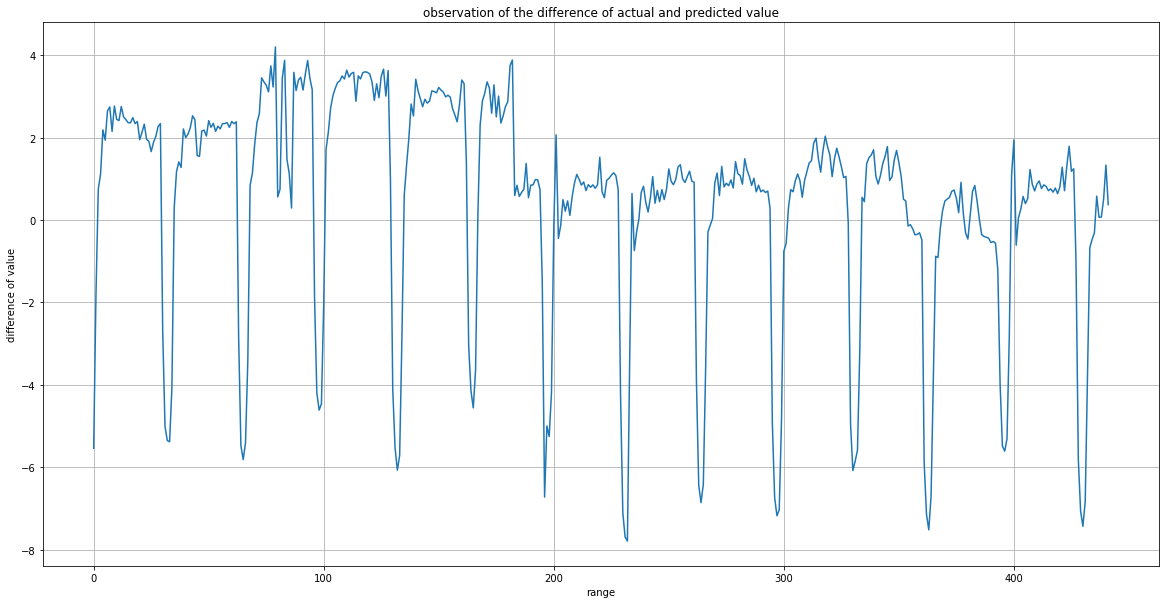

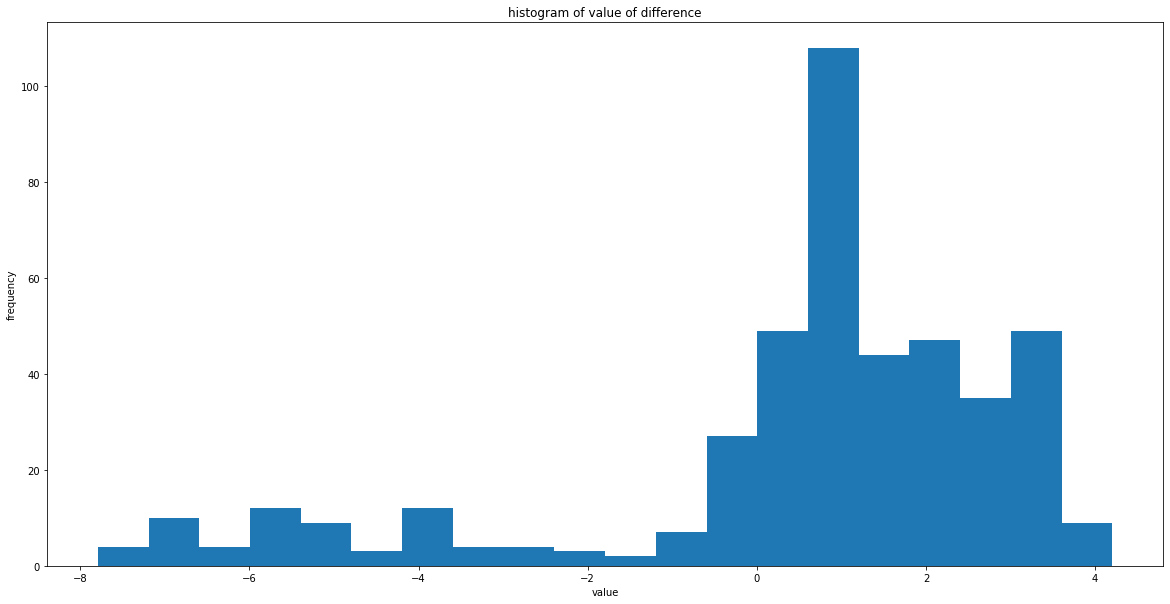

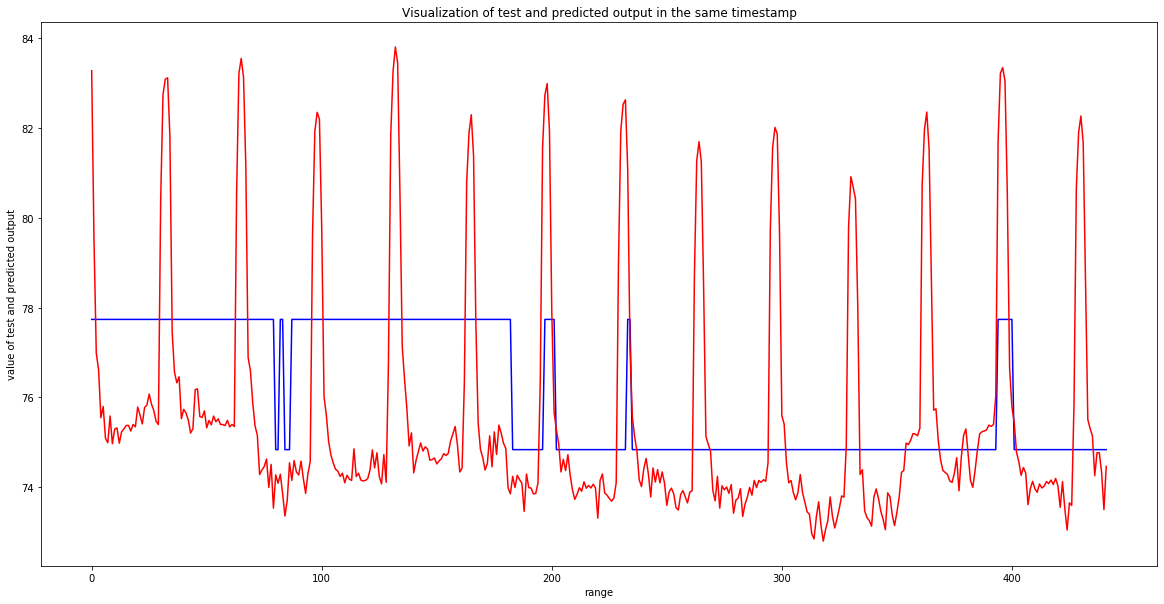

r_2 statistic: -0.04
Mean_absolute_error: 2.08
Mean squared error: 7.20
RMSE:  2.6831562283012373
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


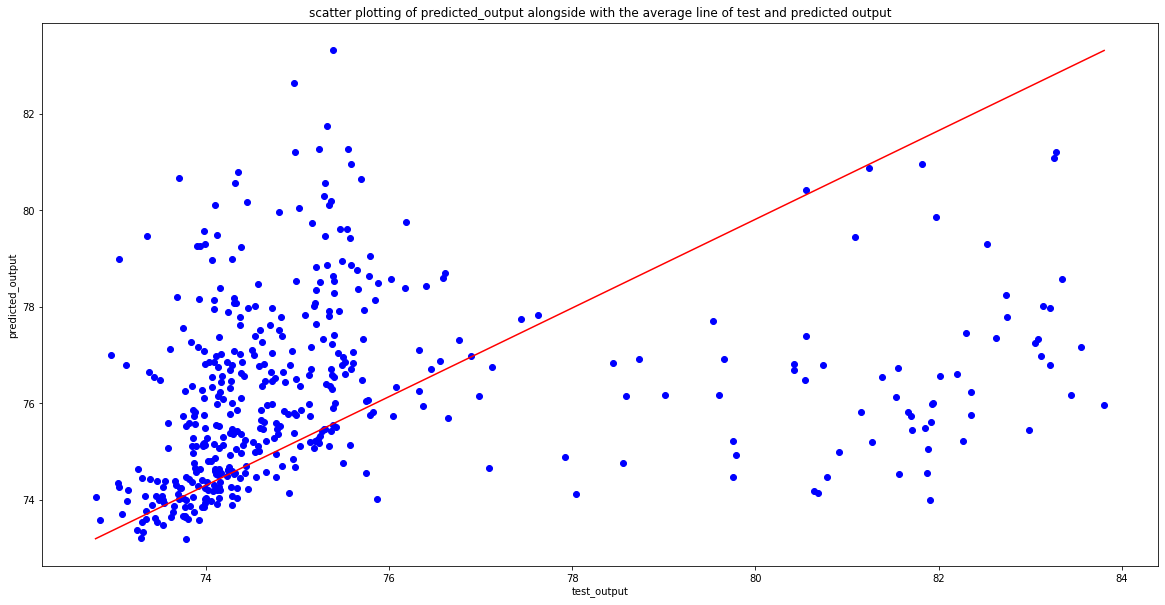

<class 'numpy.ndarray'>


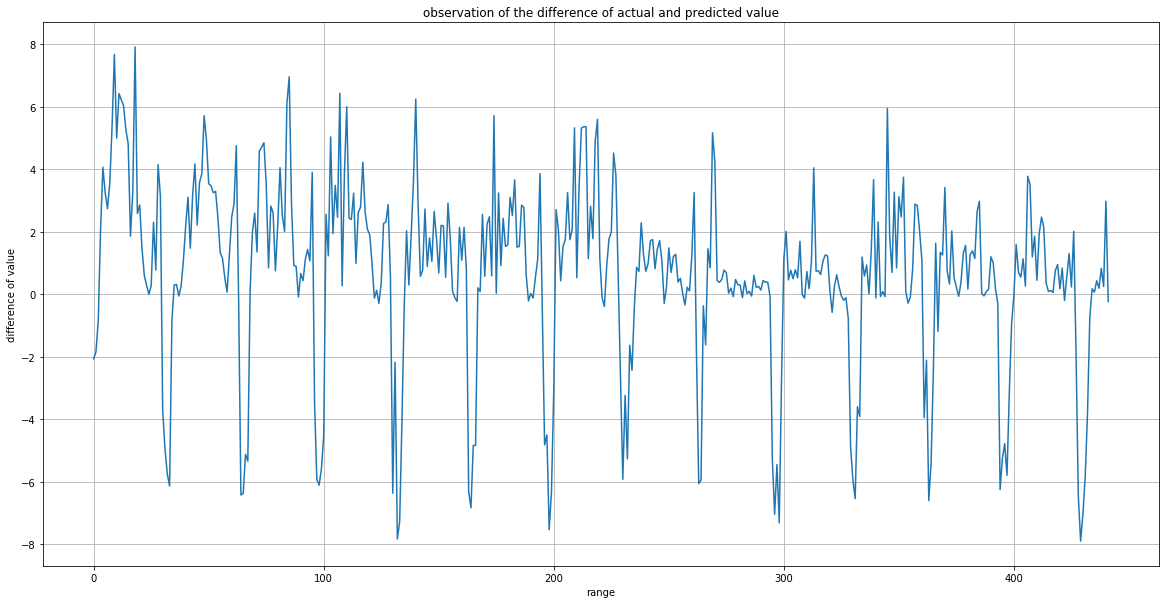

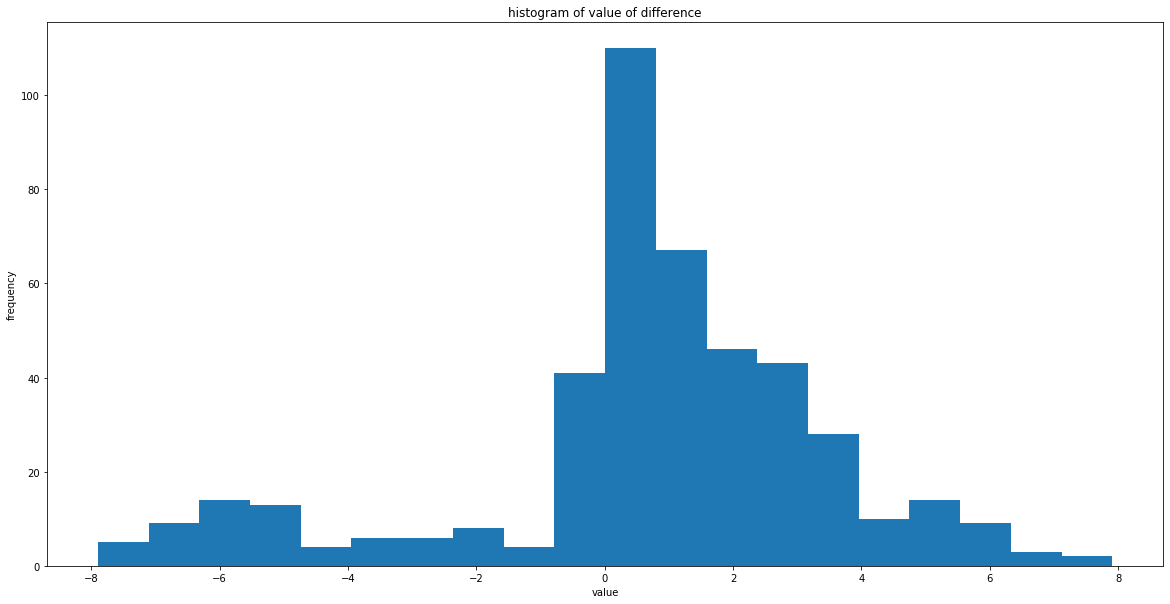

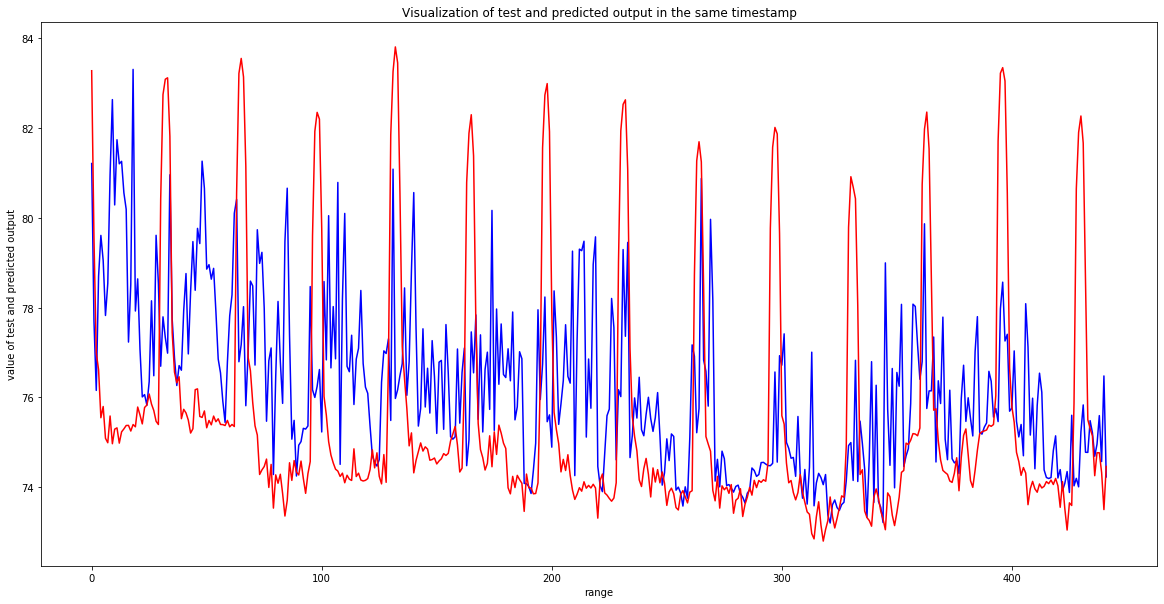

r_2 statistic: -0.26
Mean_absolute_error: 2.17
Mean squared error: 8.70
RMSE:  2.9502674795542343
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

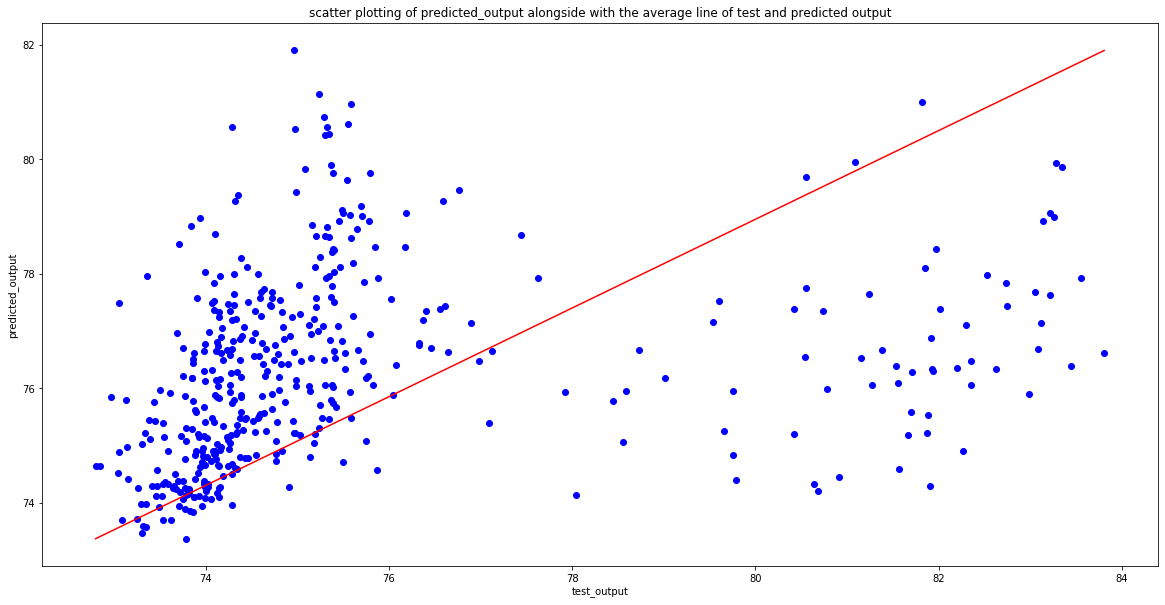

<class 'numpy.ndarray'>


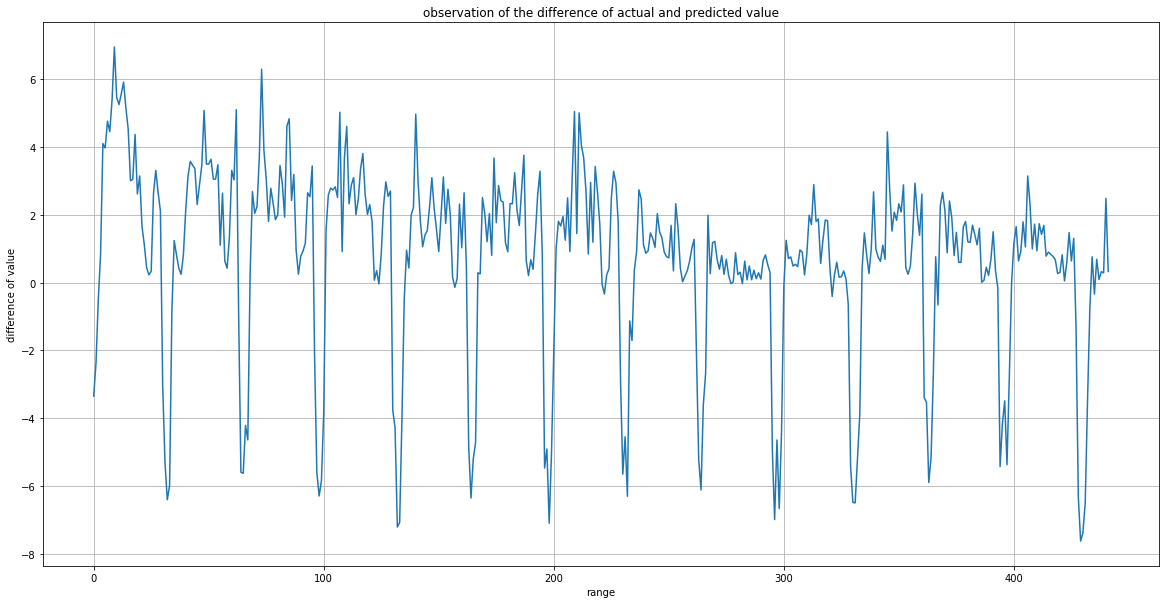

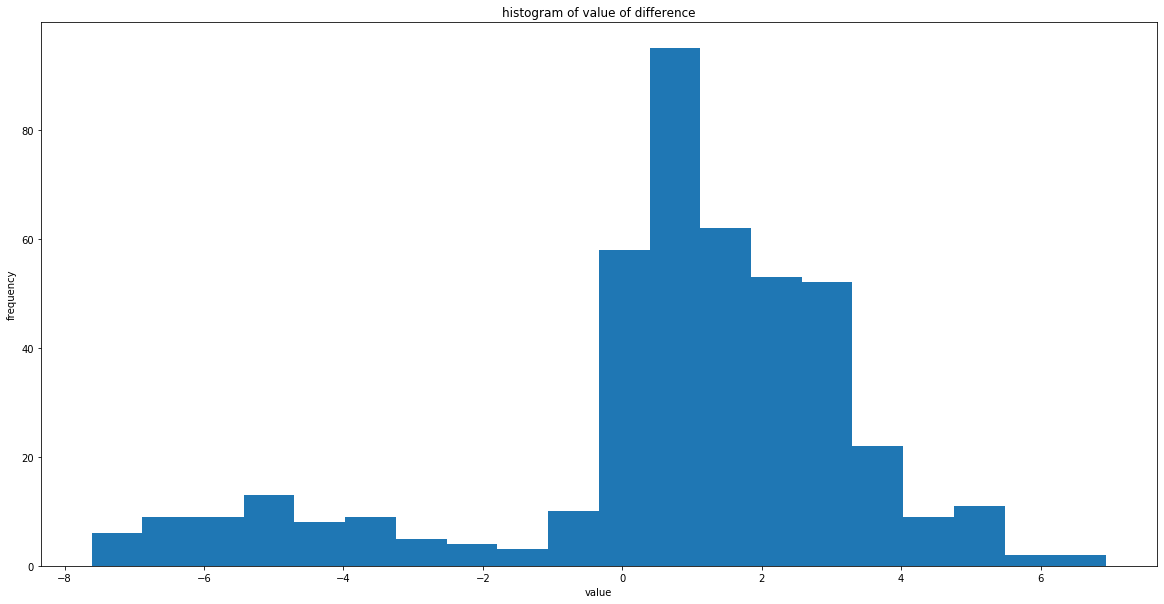

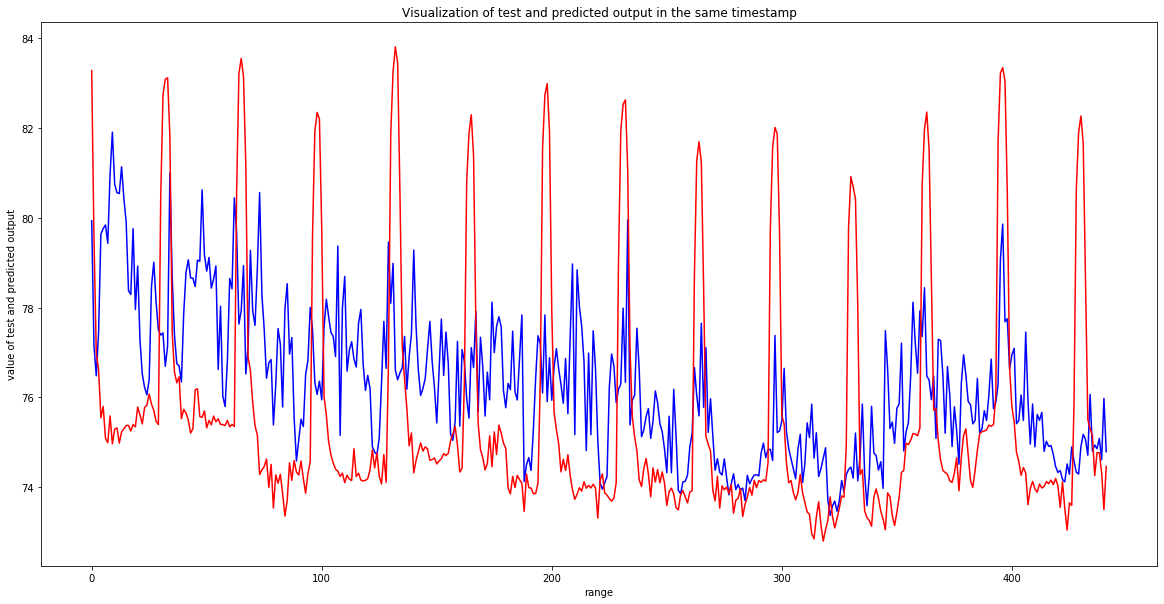

r_2 statistic: -0.13
Mean_absolute_error: 2.17
Mean squared error: 7.81
RMSE:  2.7947872552525523
!!!!---------------!!!!----------------!!!!
------- GBR


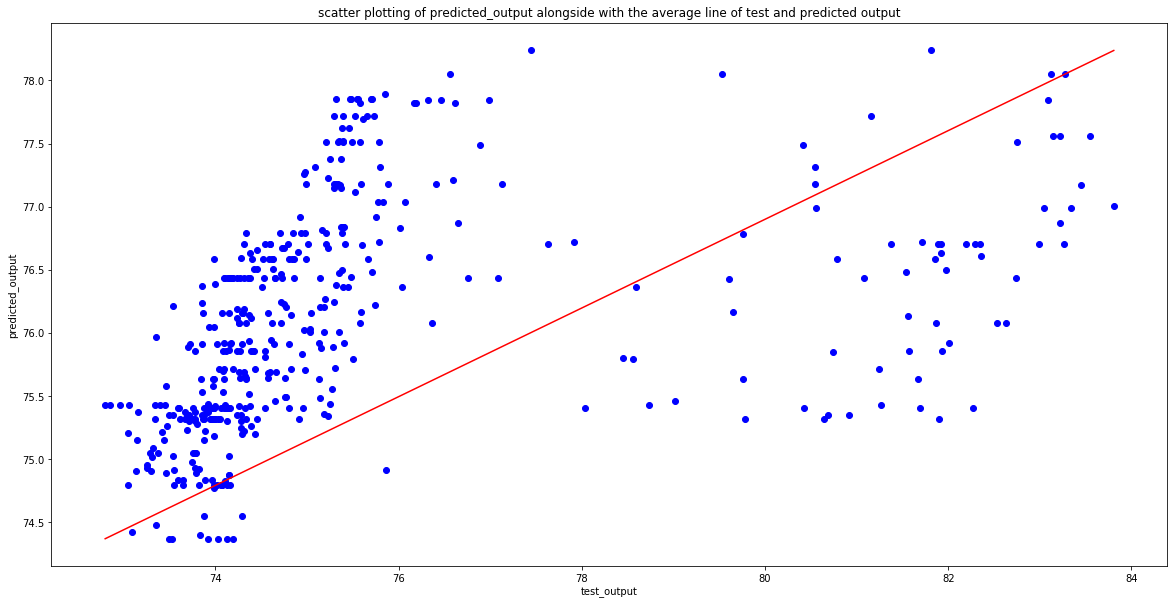

<class 'numpy.ndarray'>


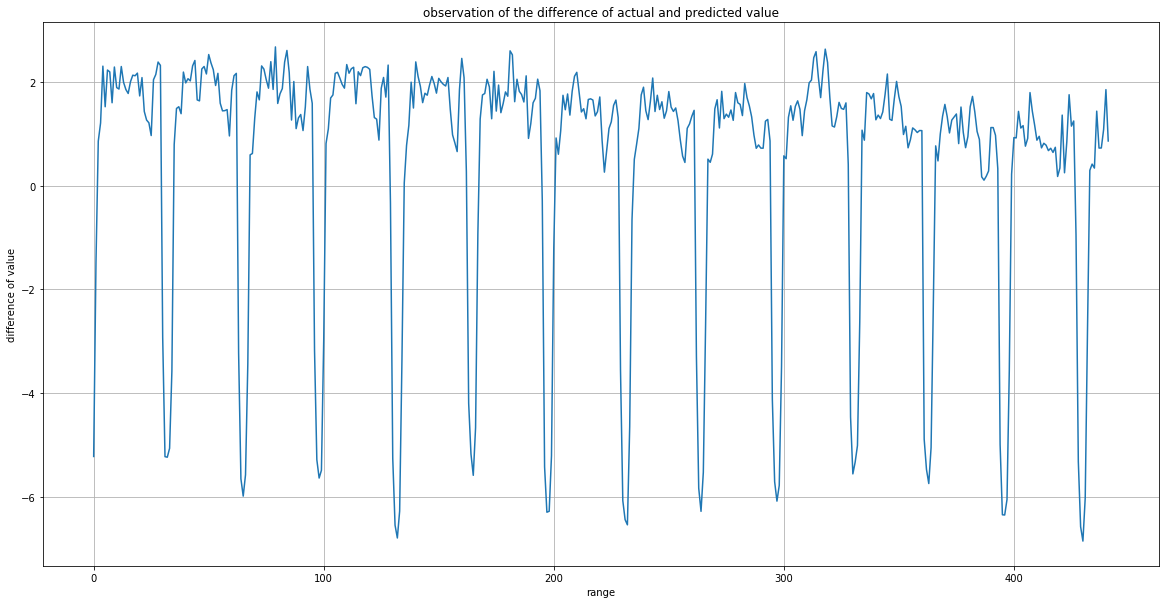

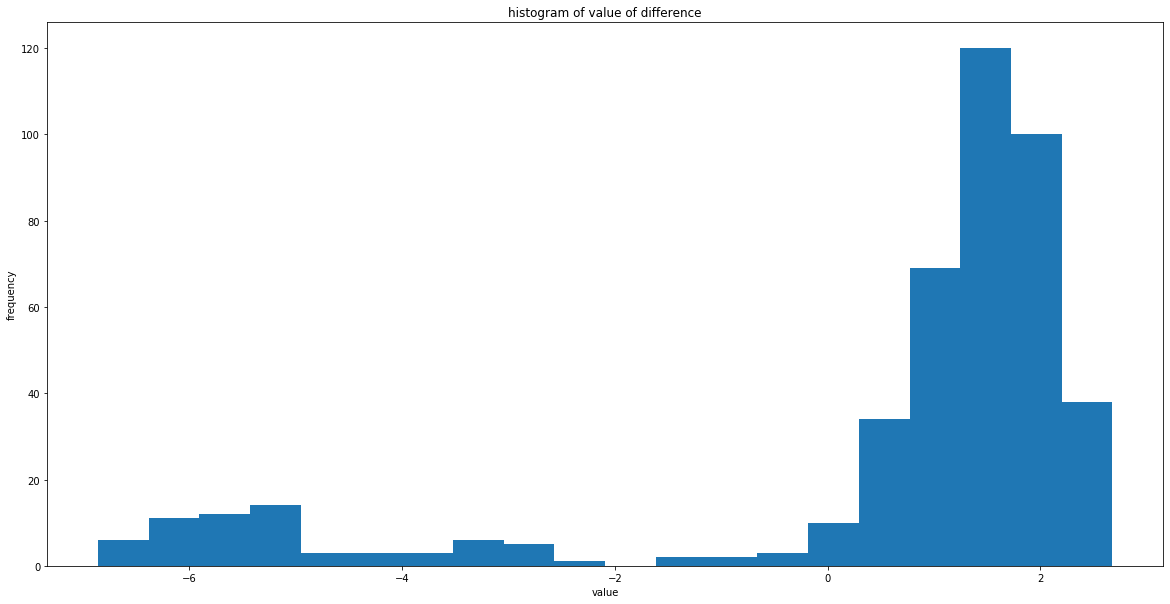

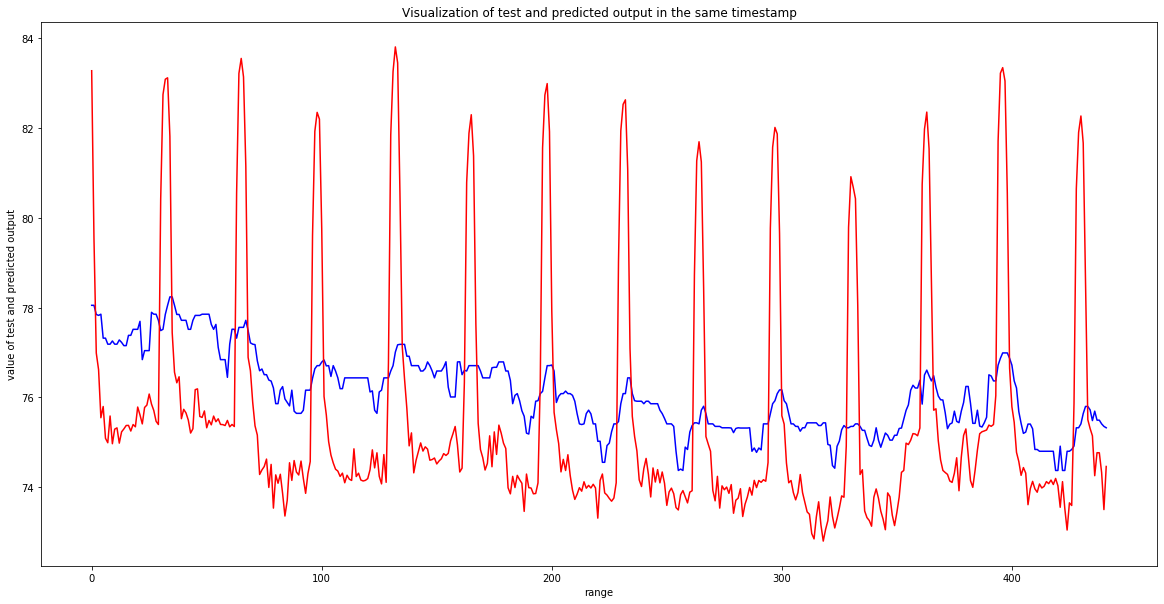

r_2 statistic: 0.13
Mean_absolute_error: 1.99
Mean squared error: 6.03
RMSE:  2.455832912104902
!!!!---------------!!!!----------------!!!!


In [59]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

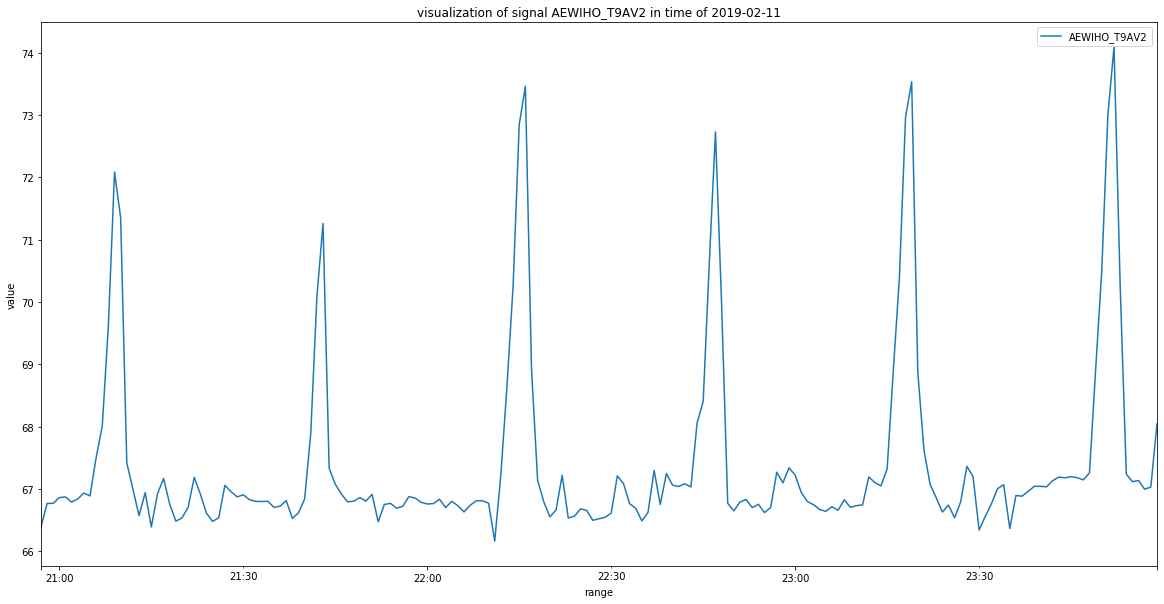

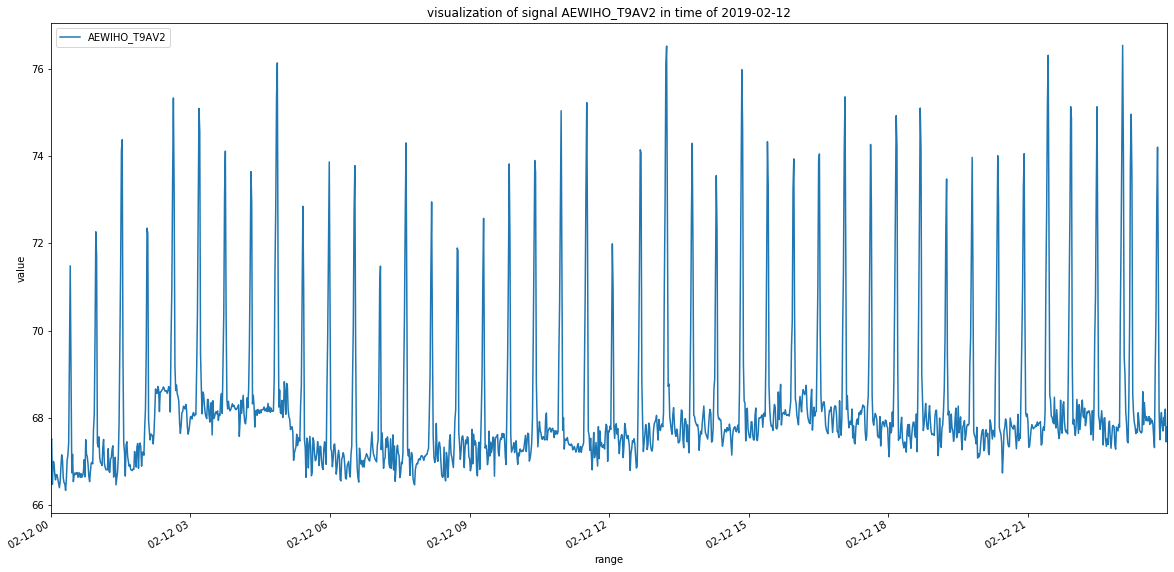

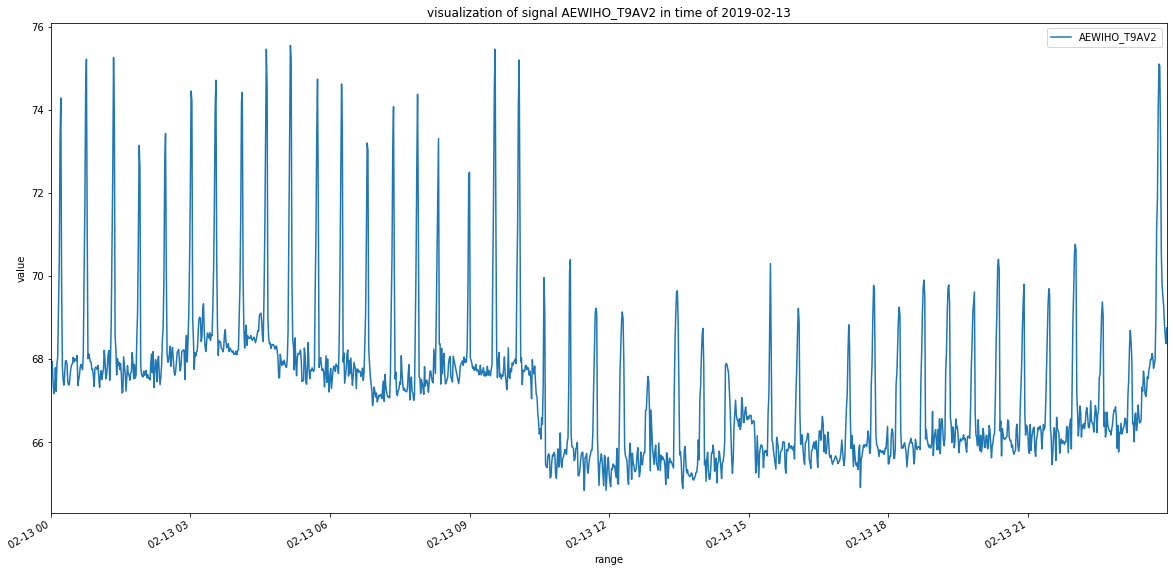

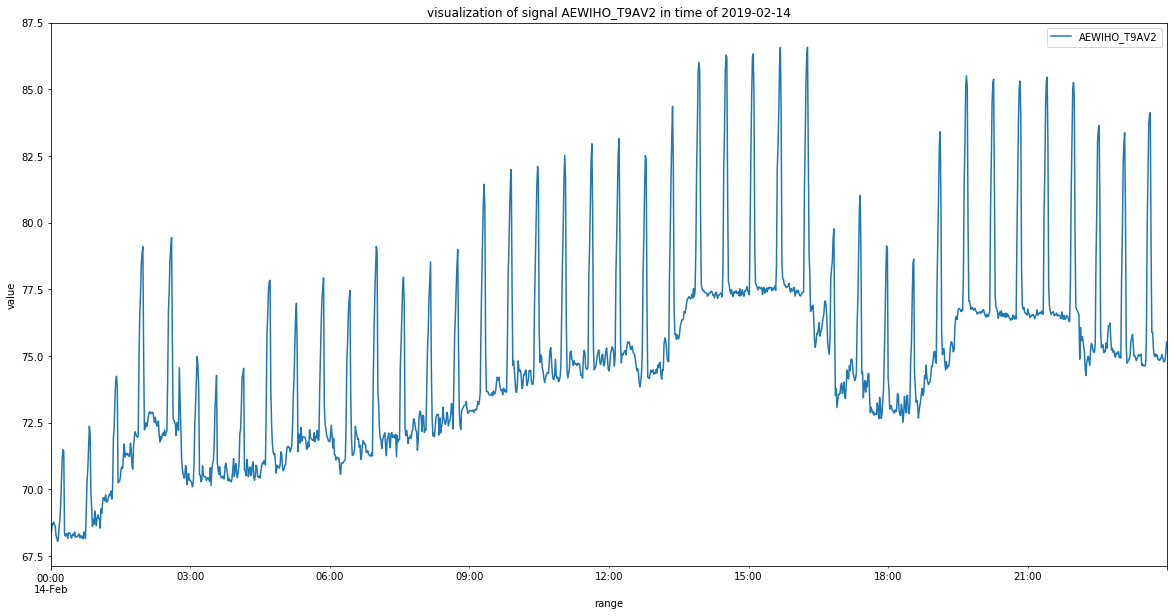

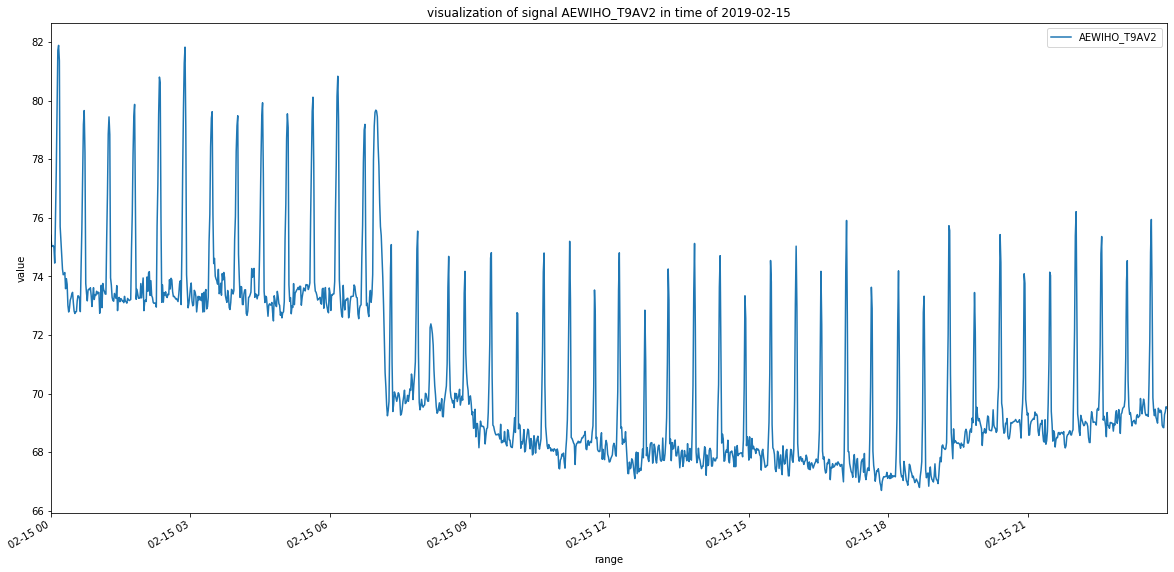

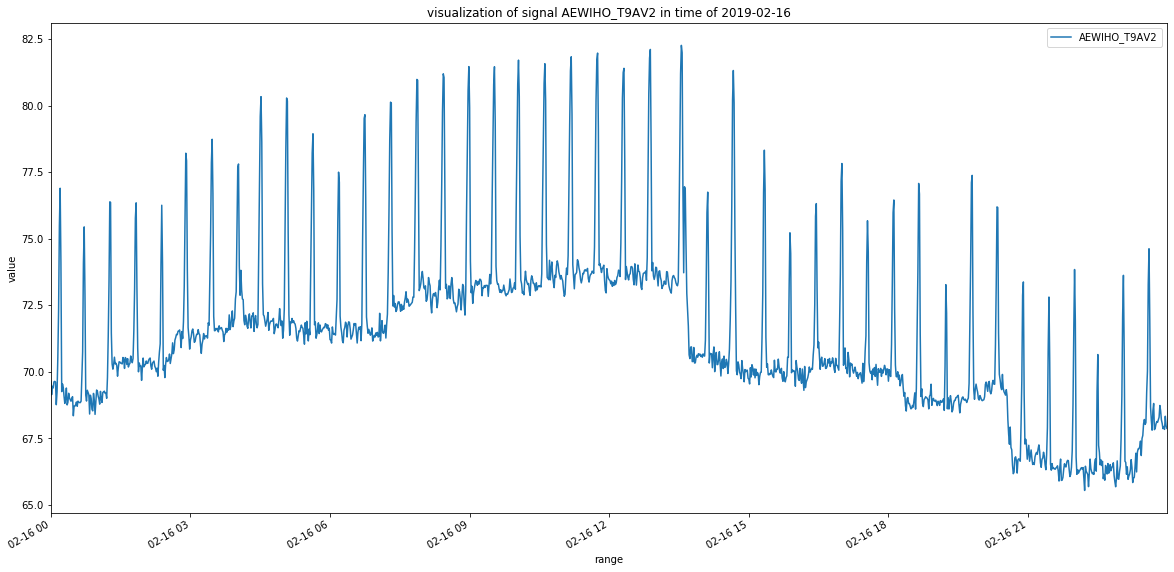

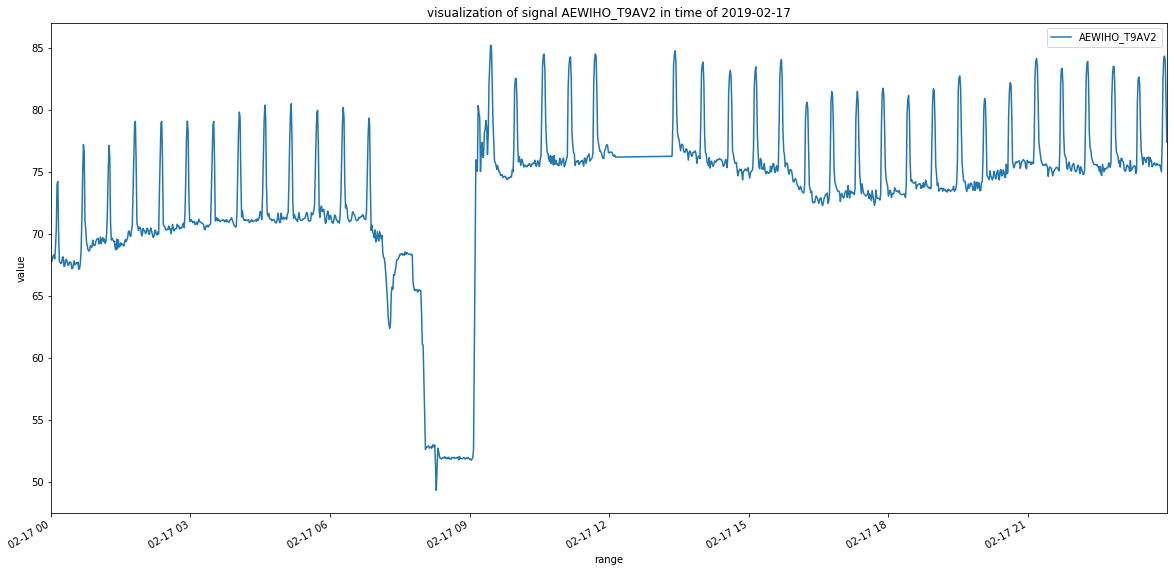

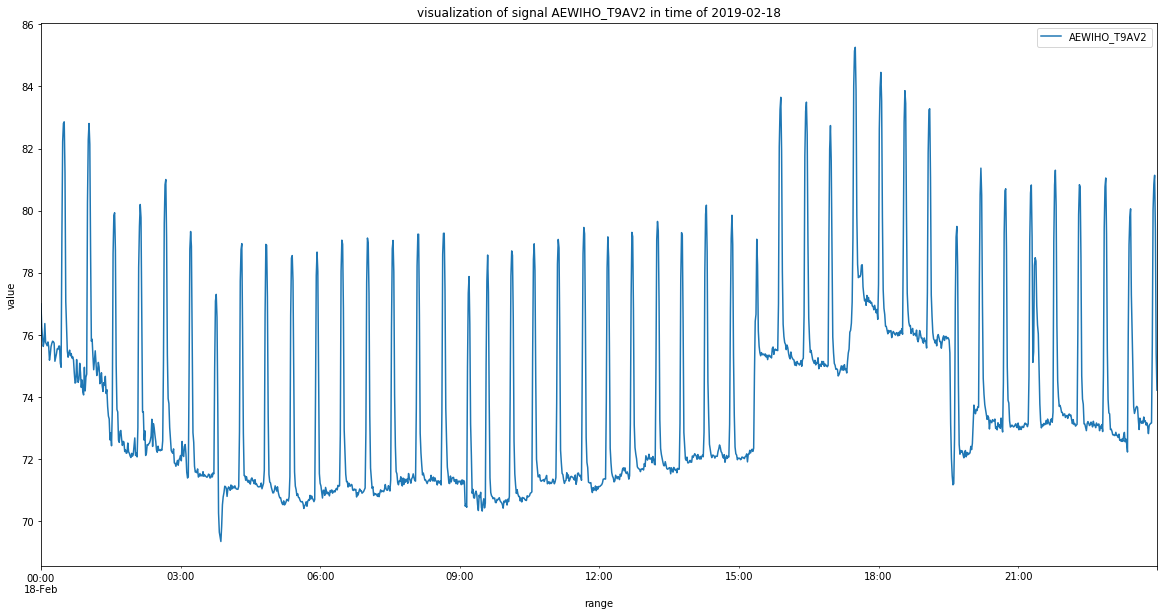

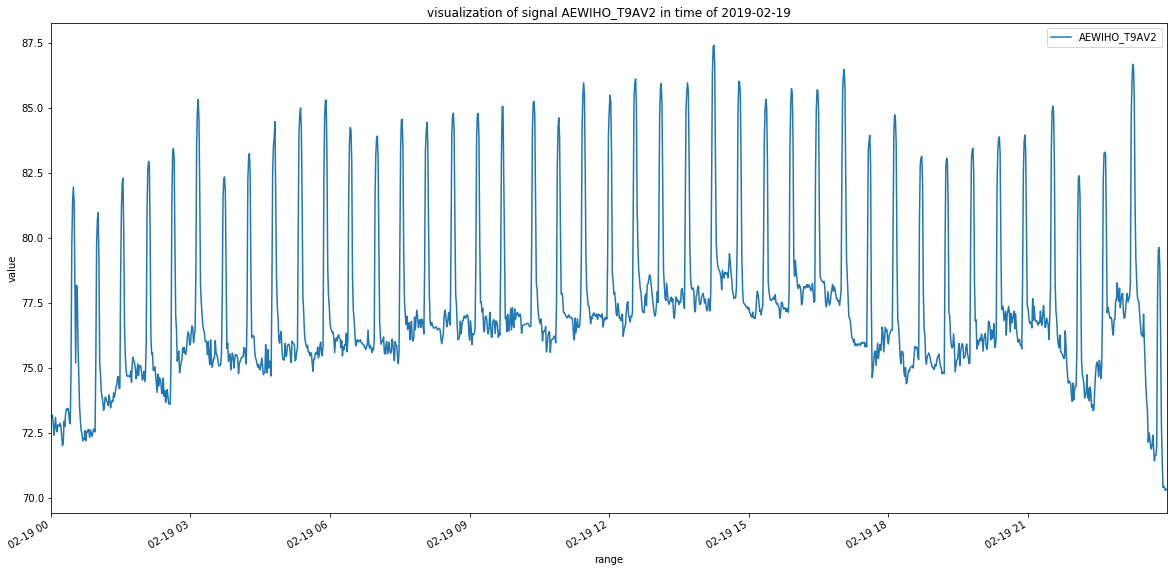

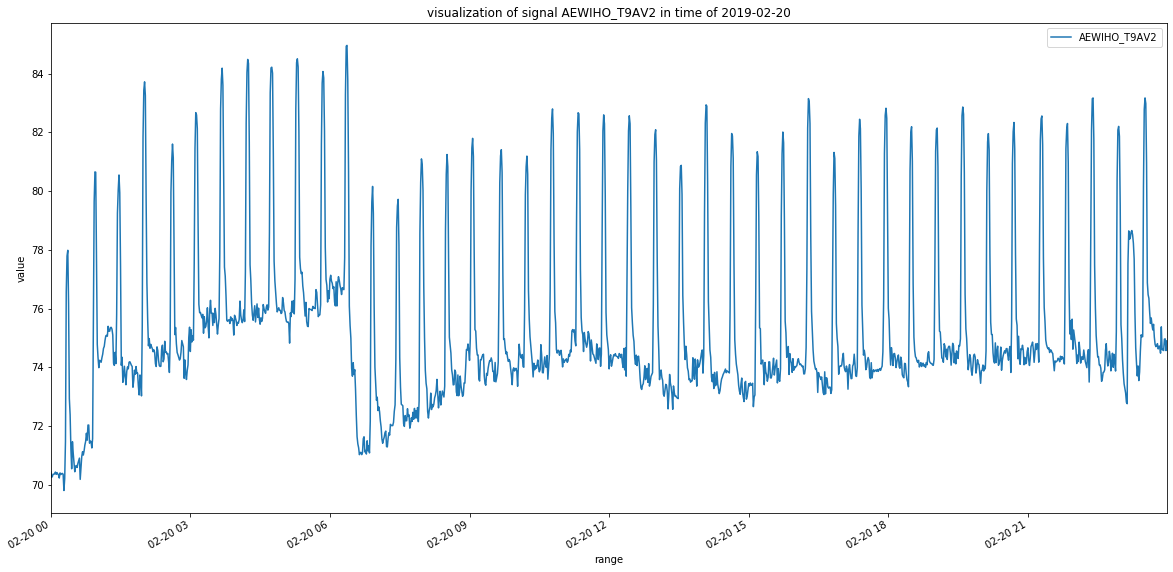

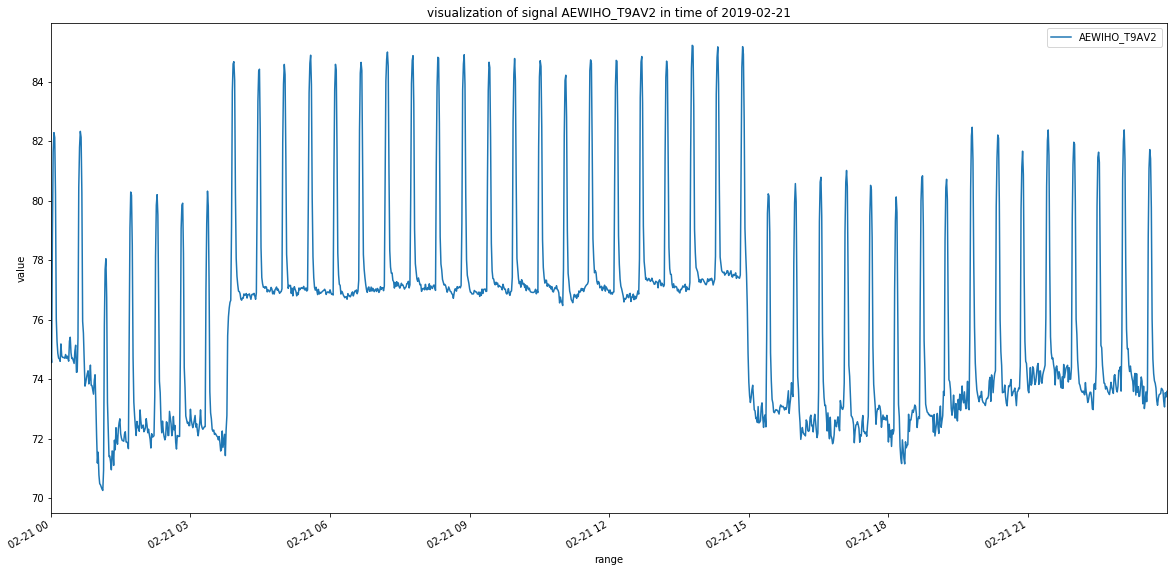

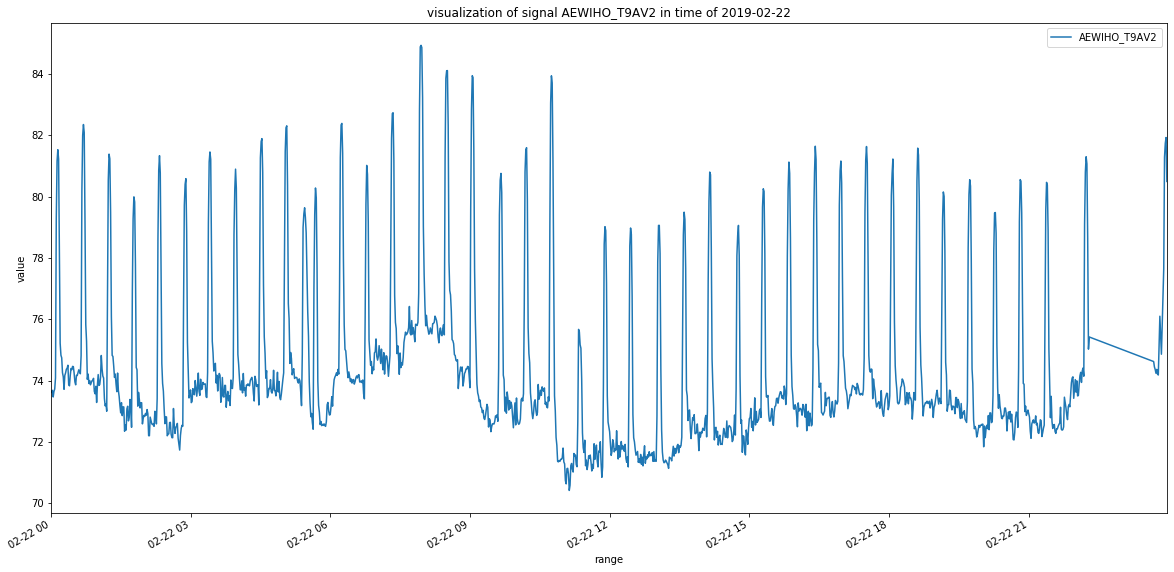

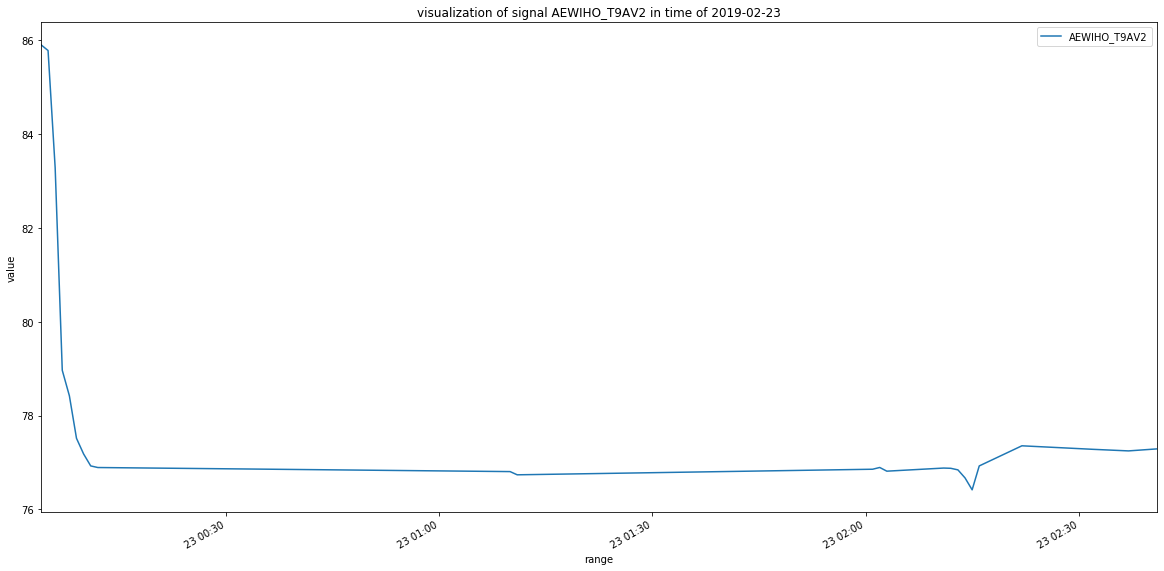

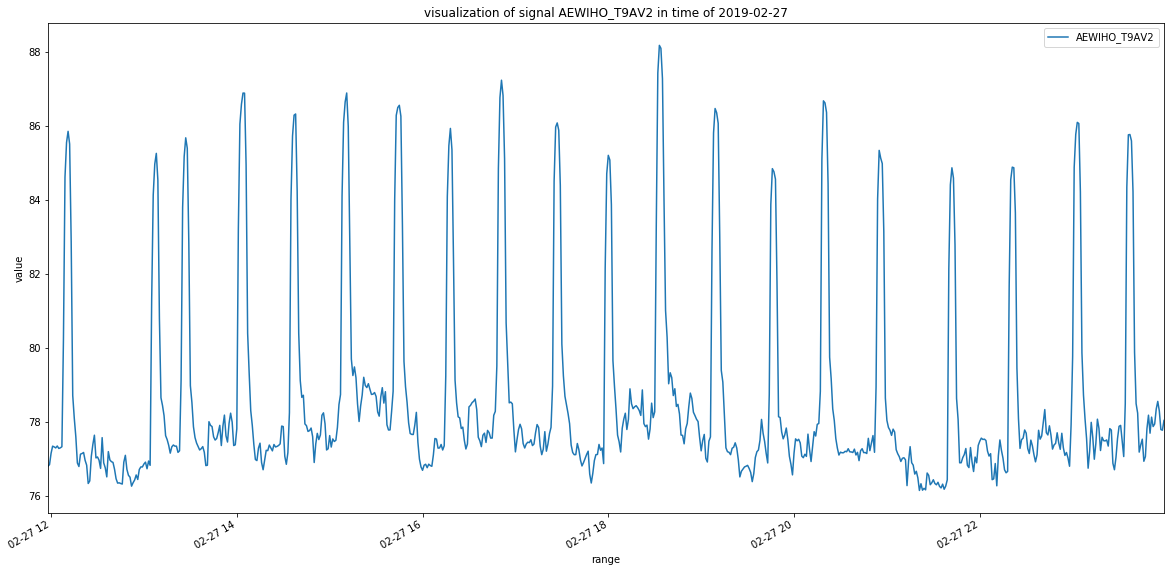

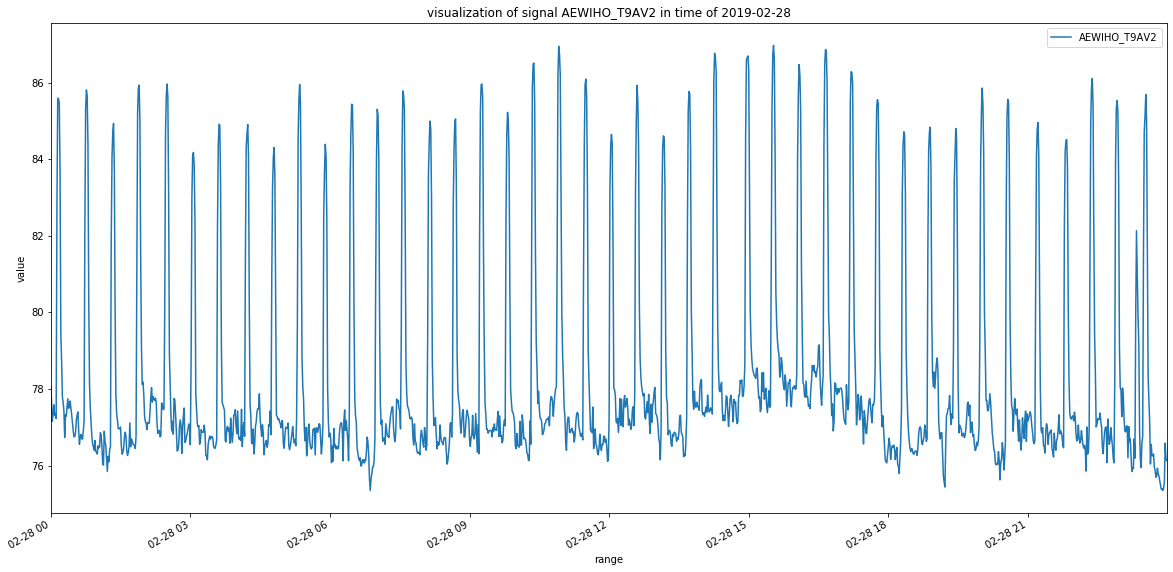

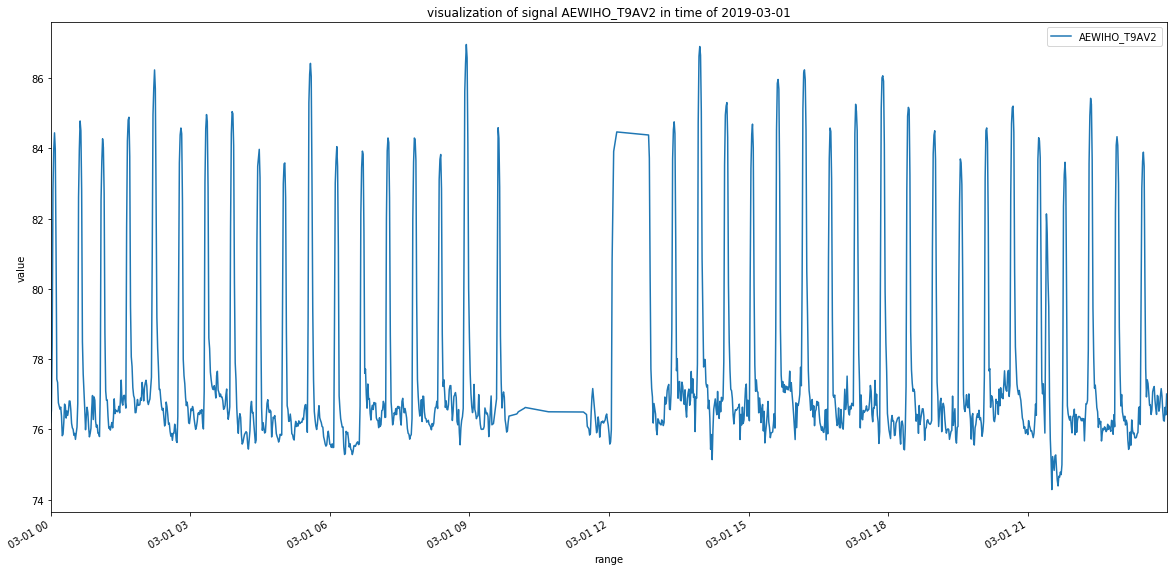

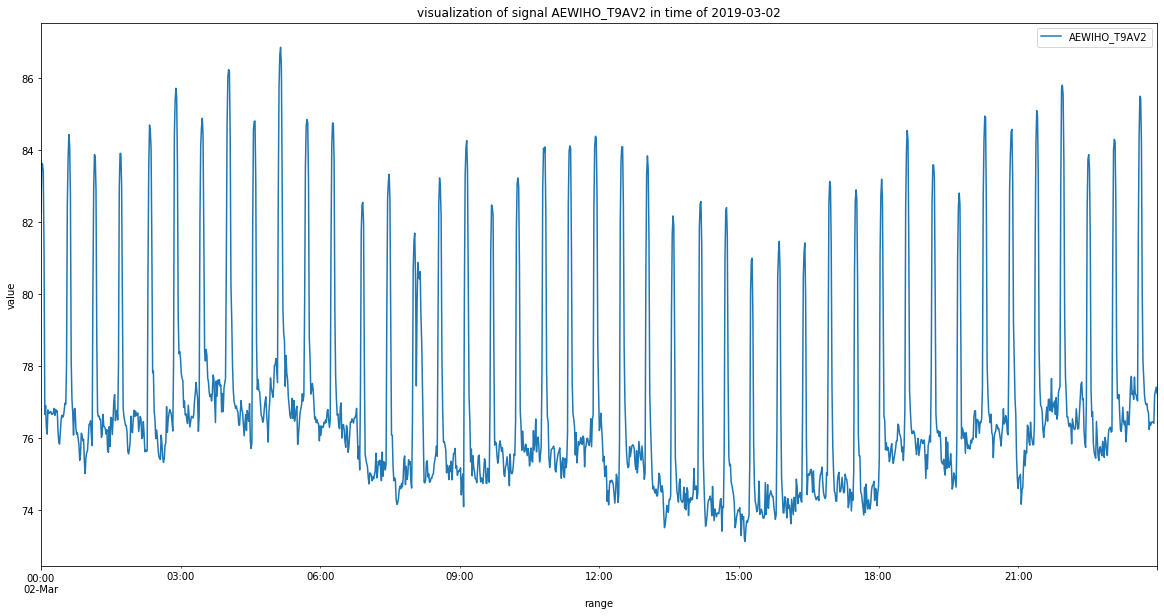

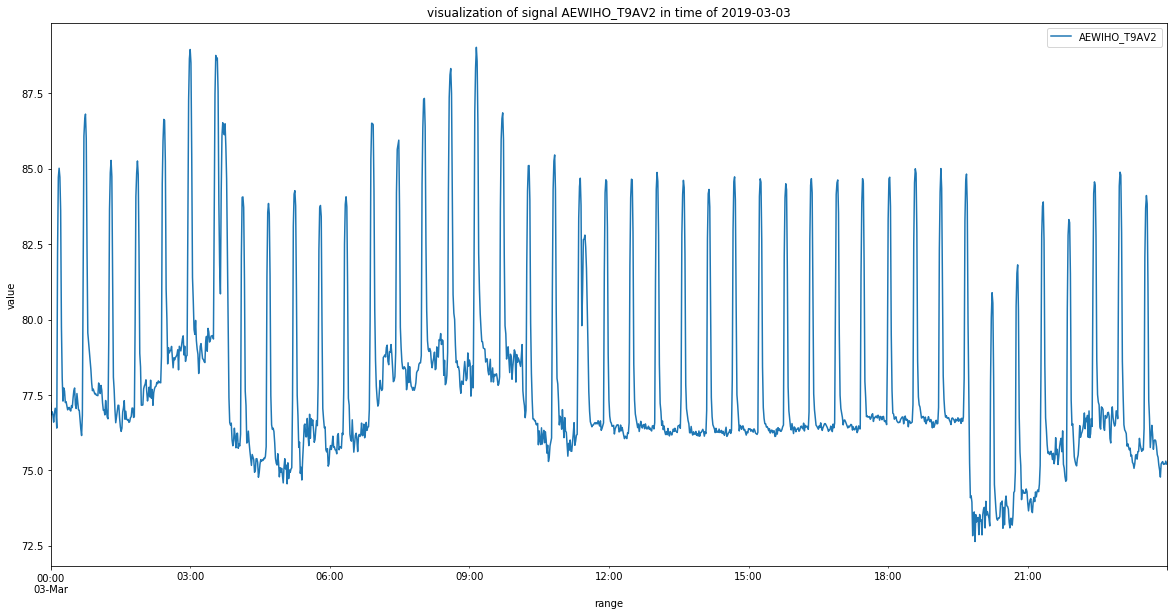

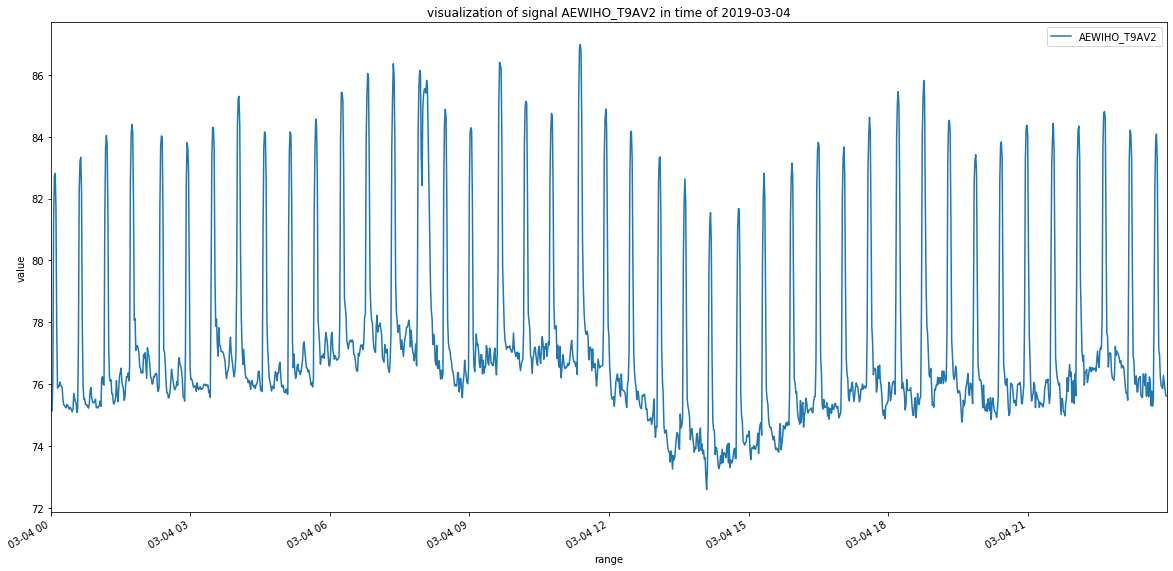

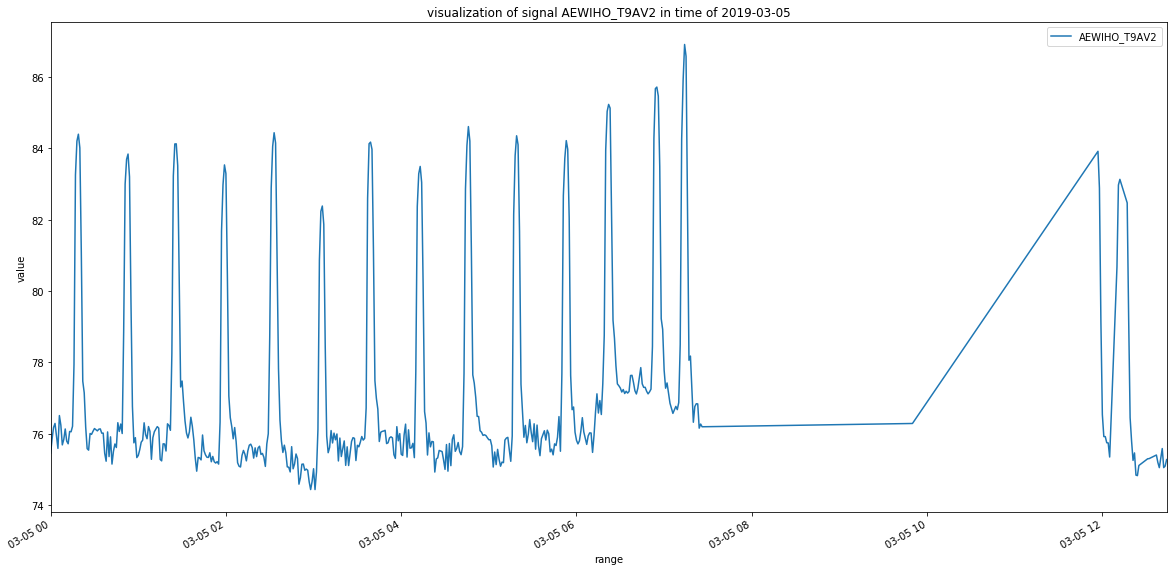

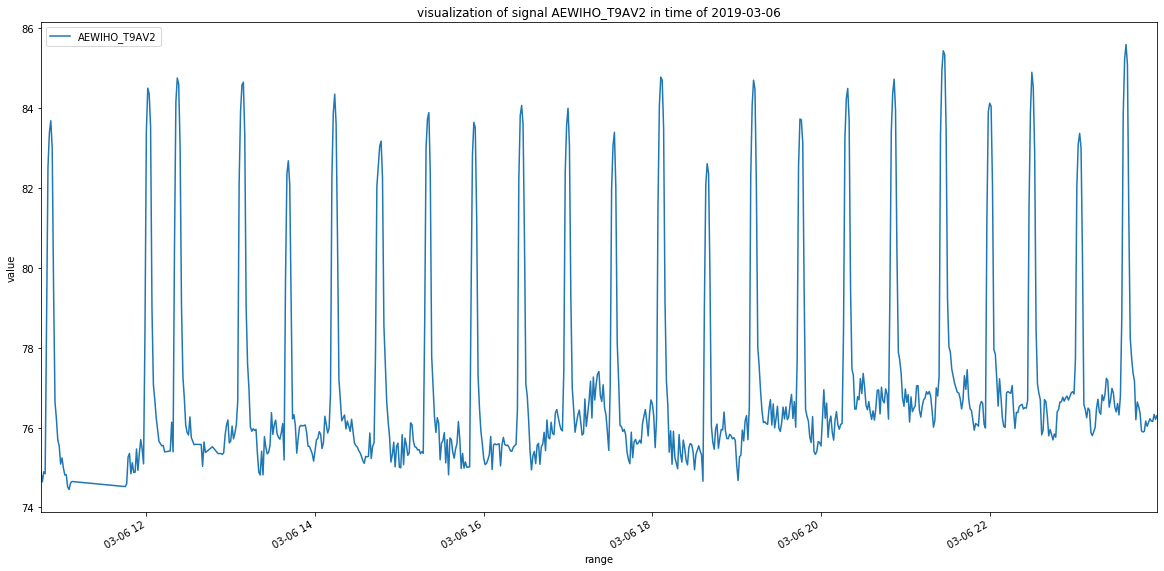

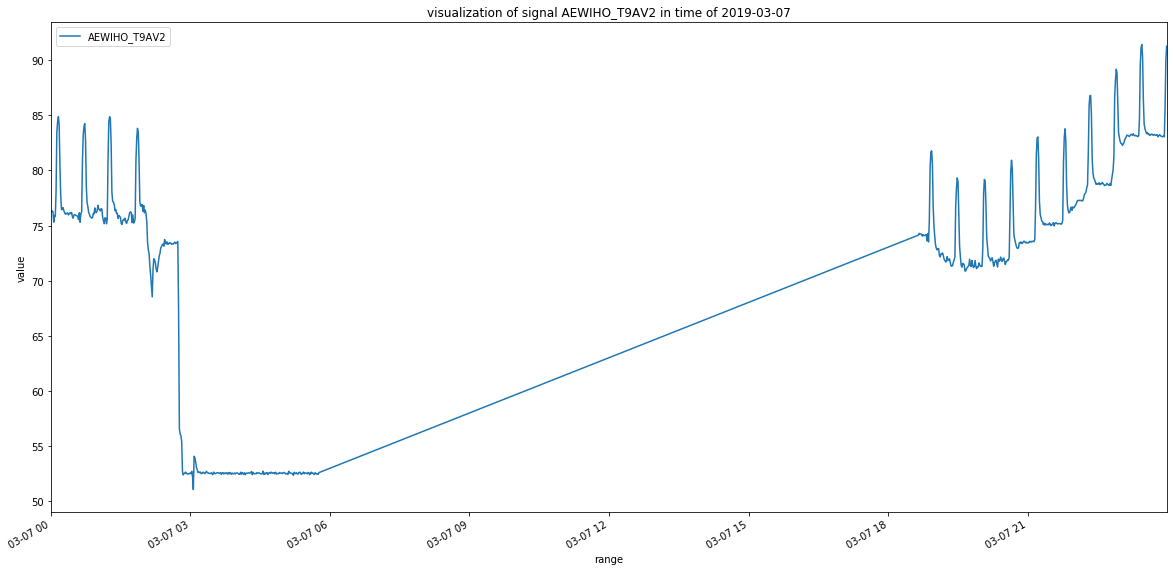

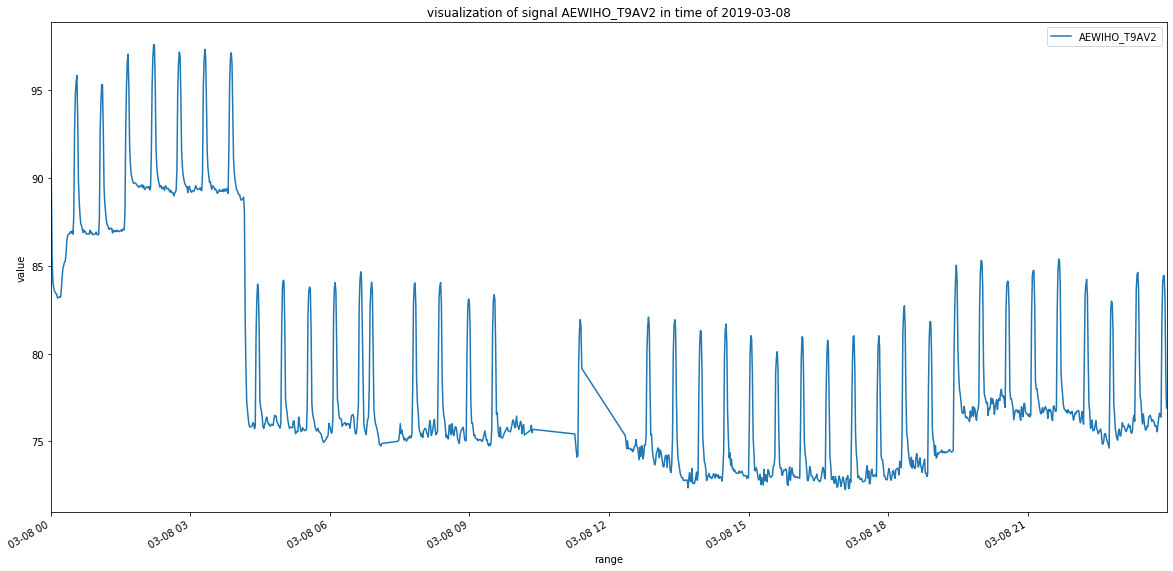

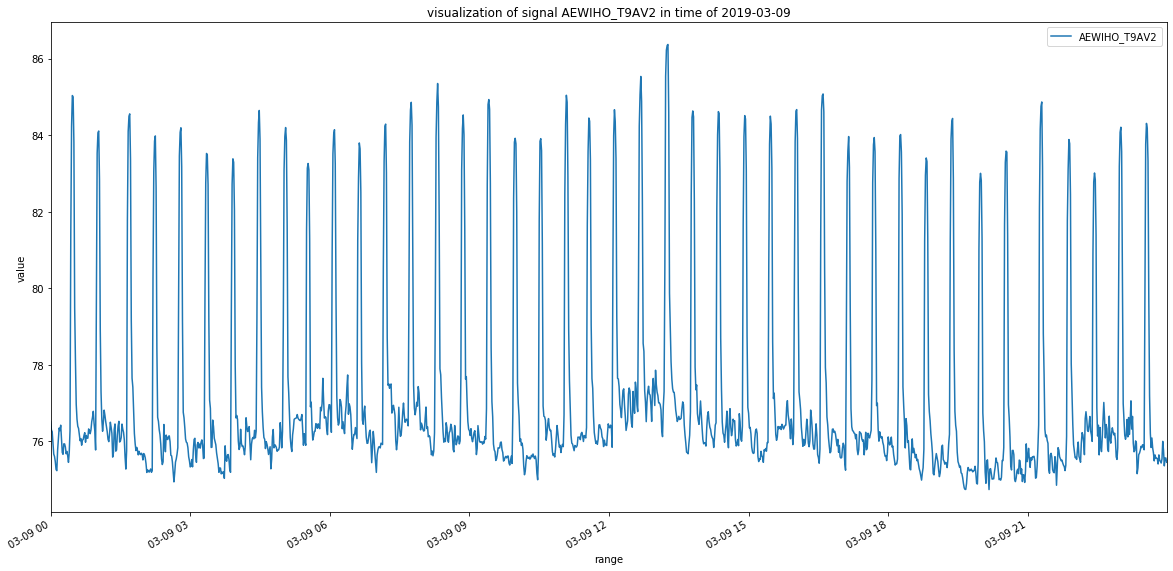

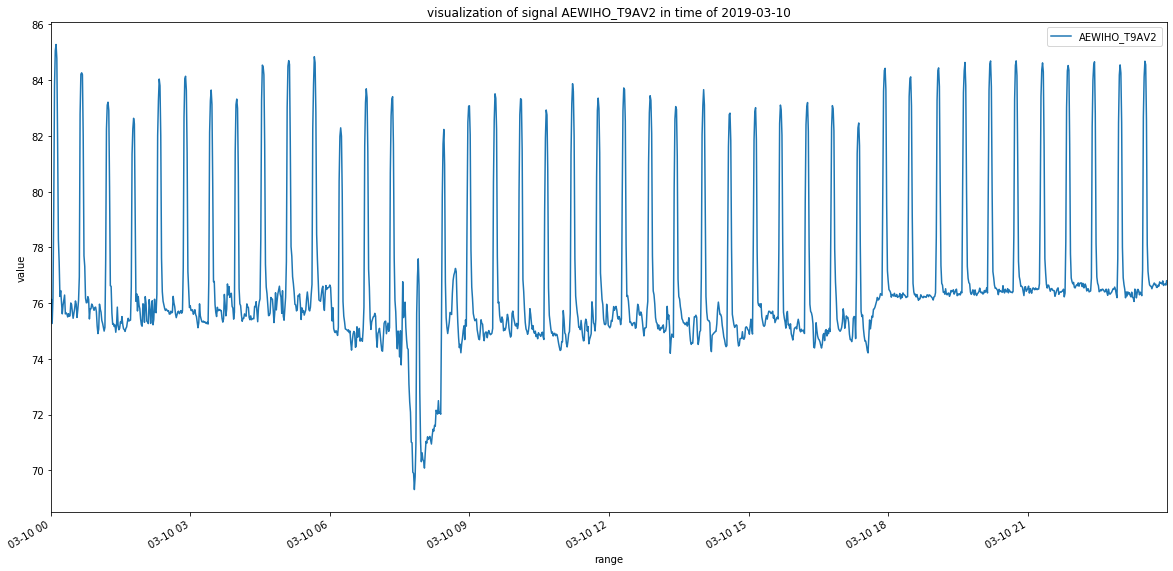

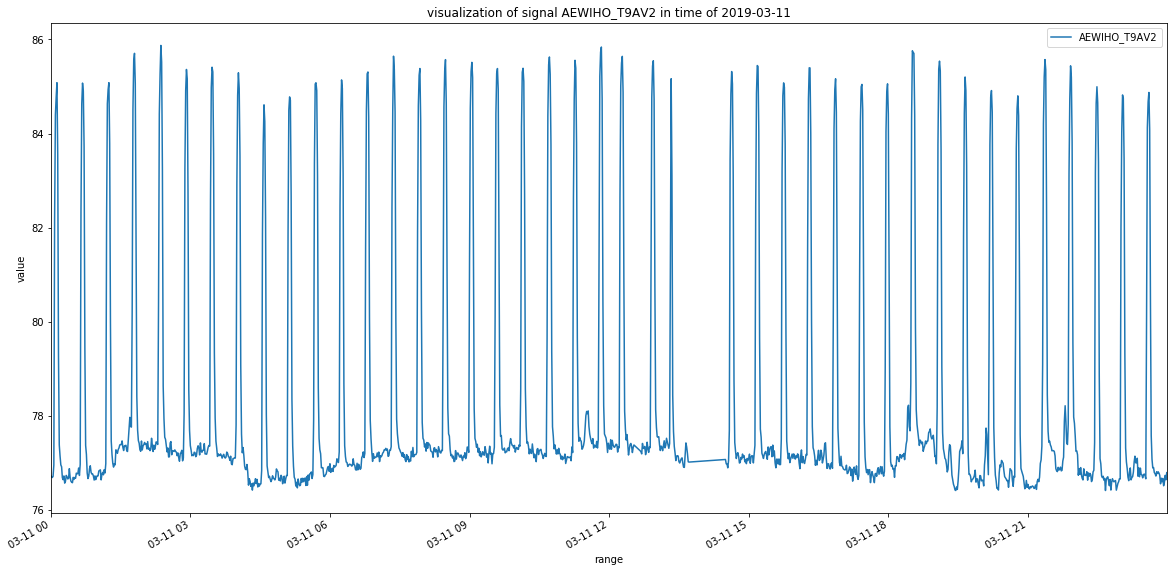

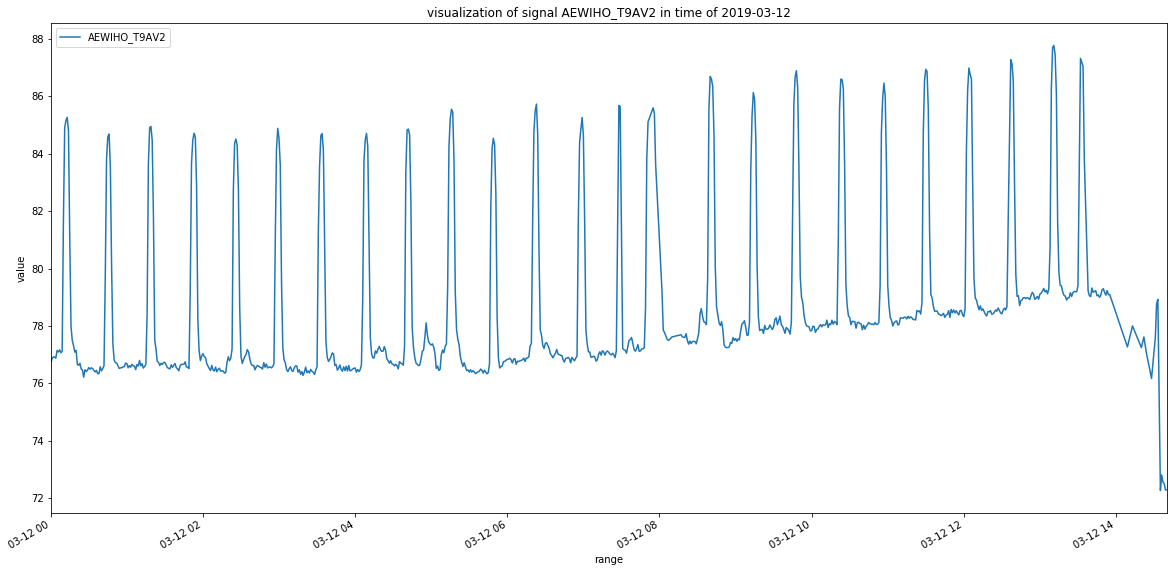

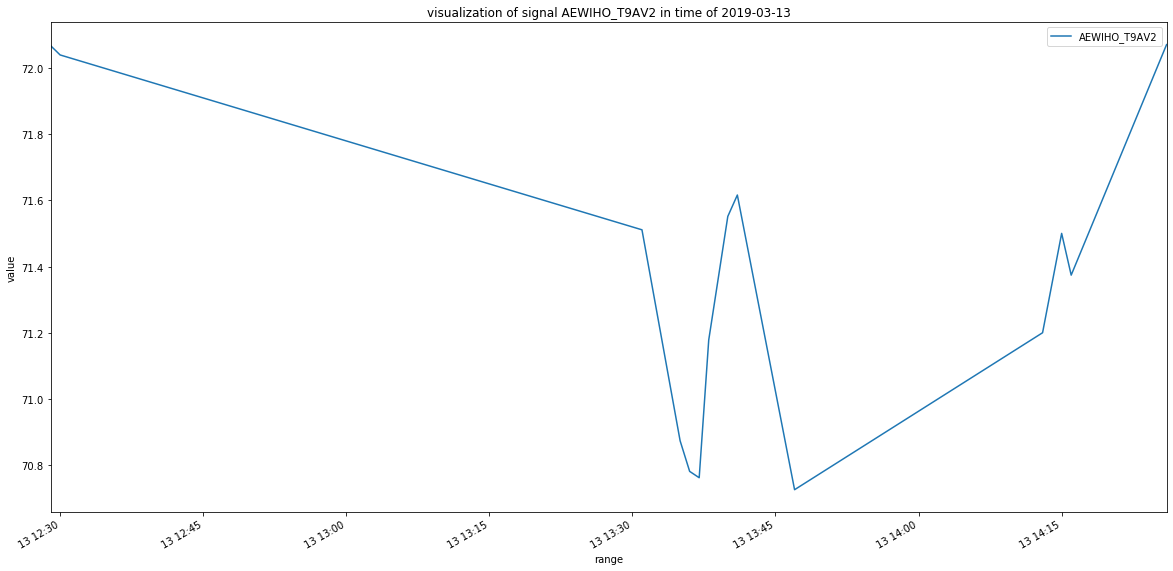

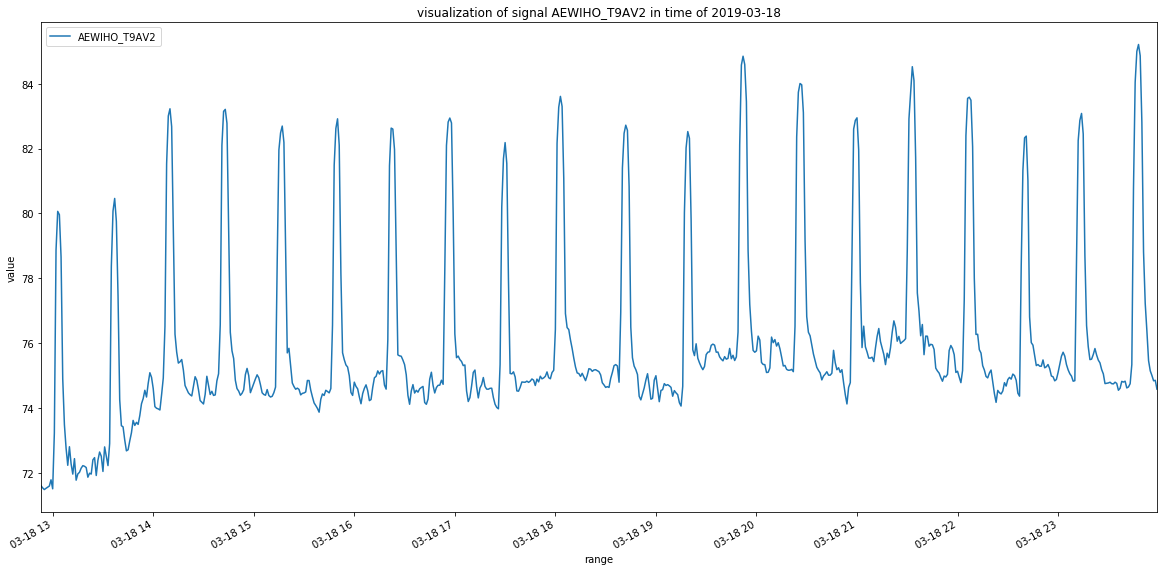

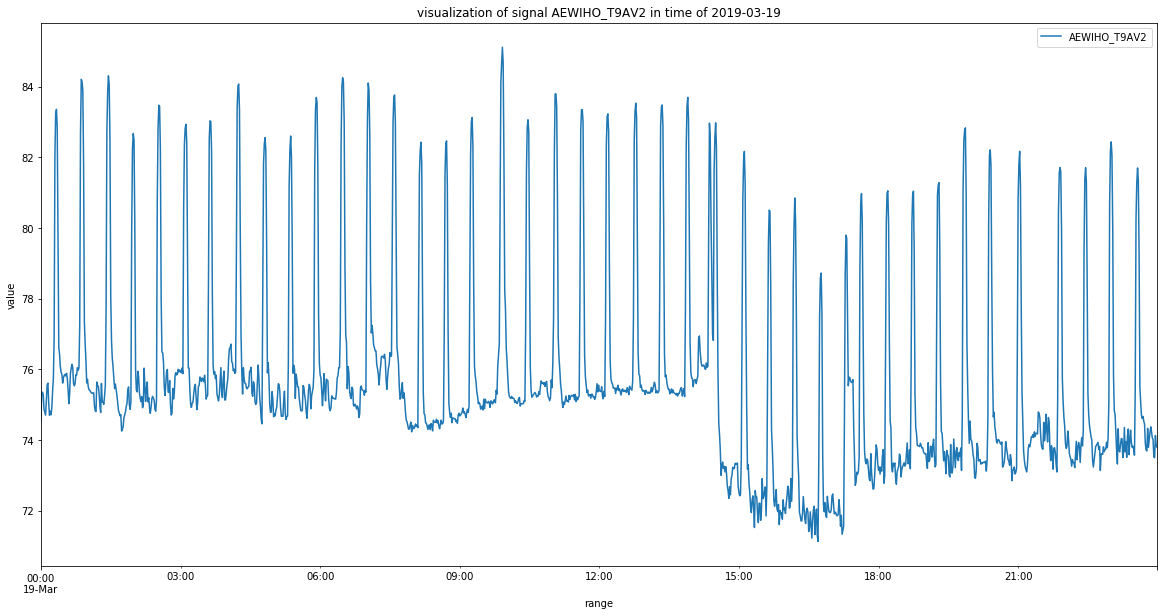

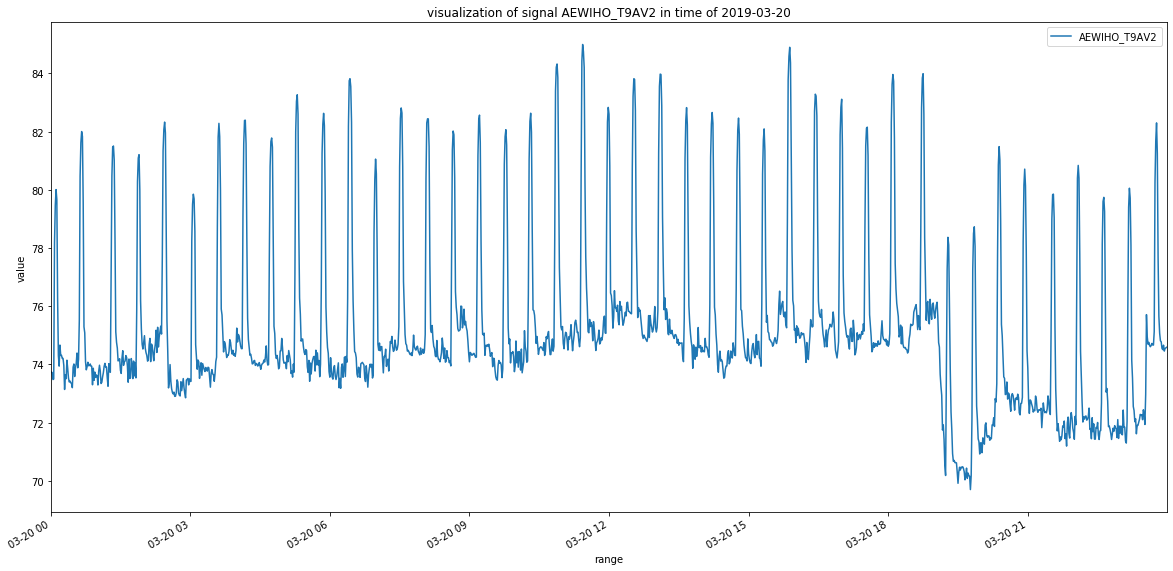

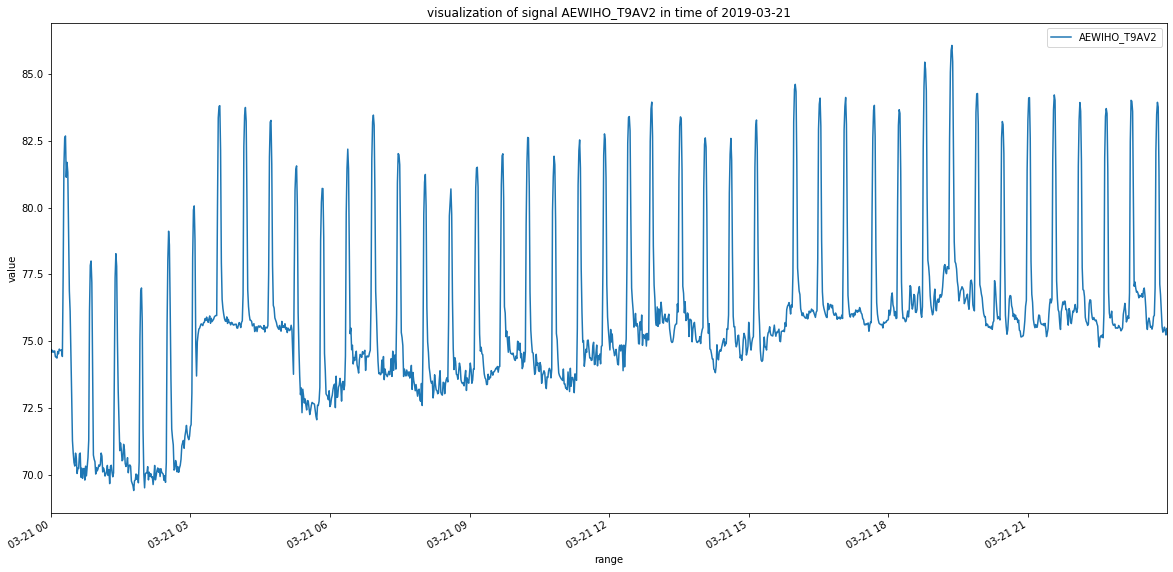

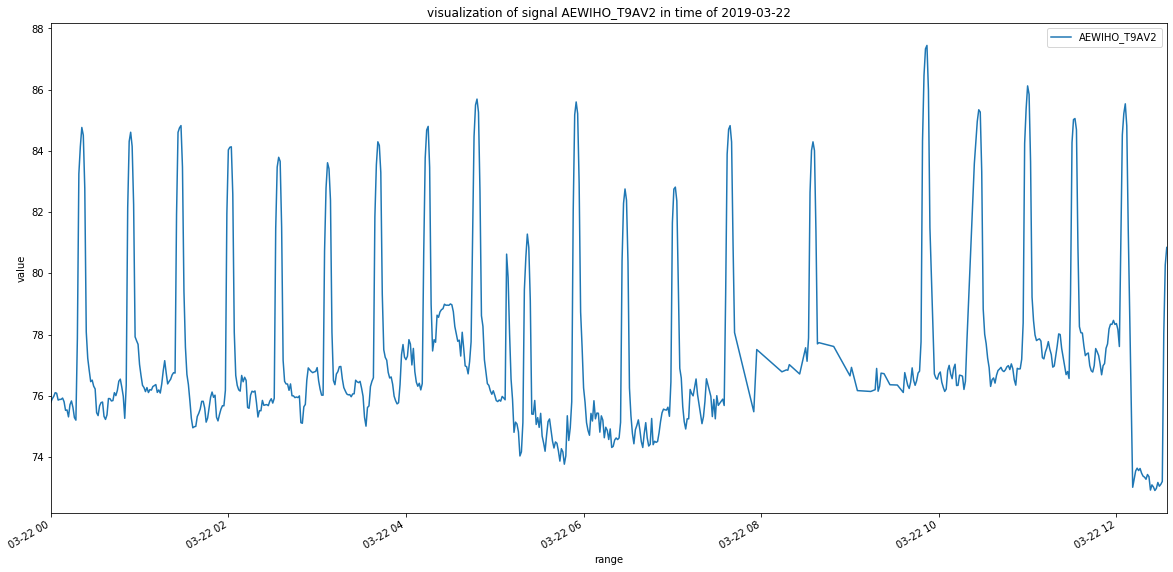

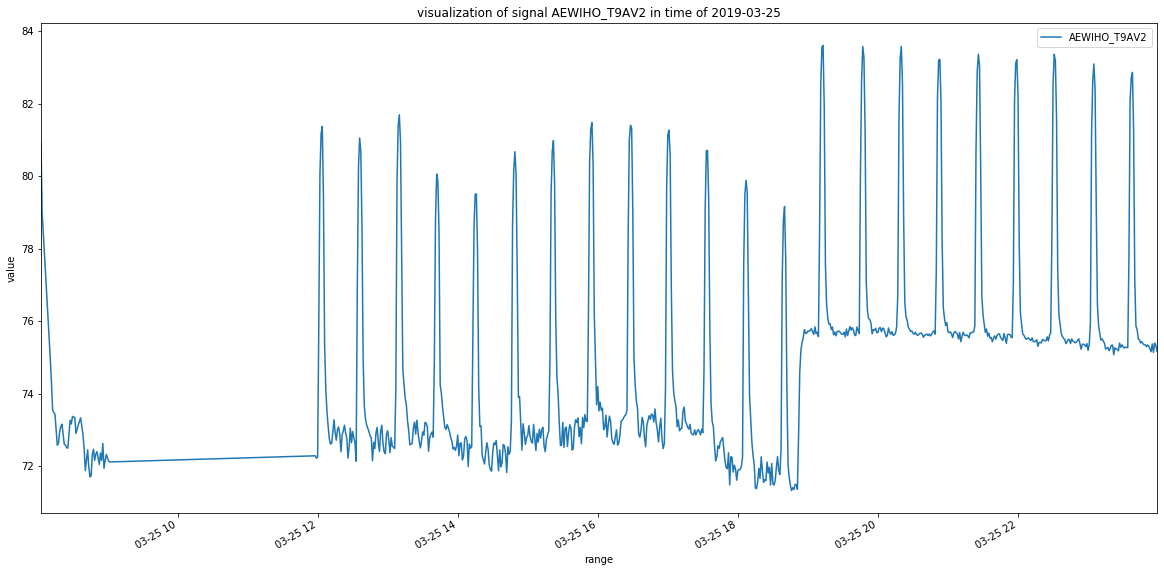

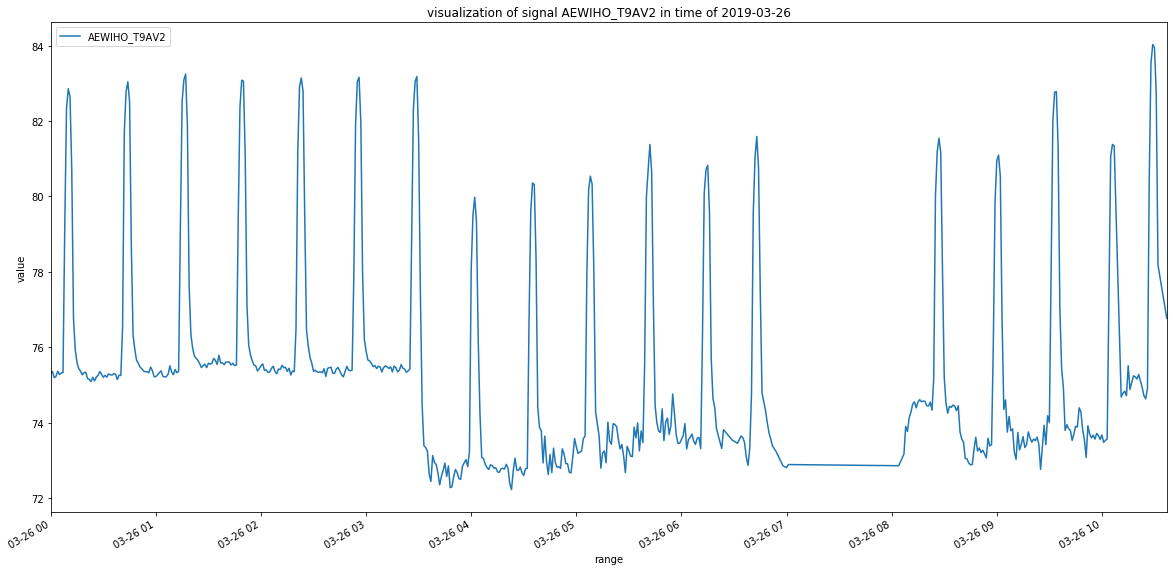

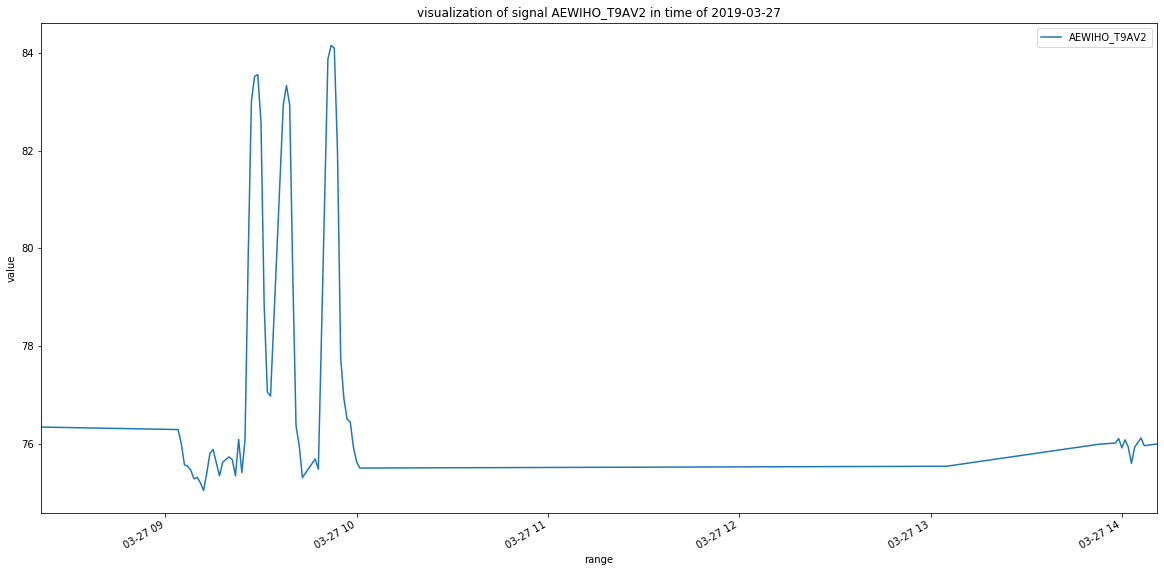

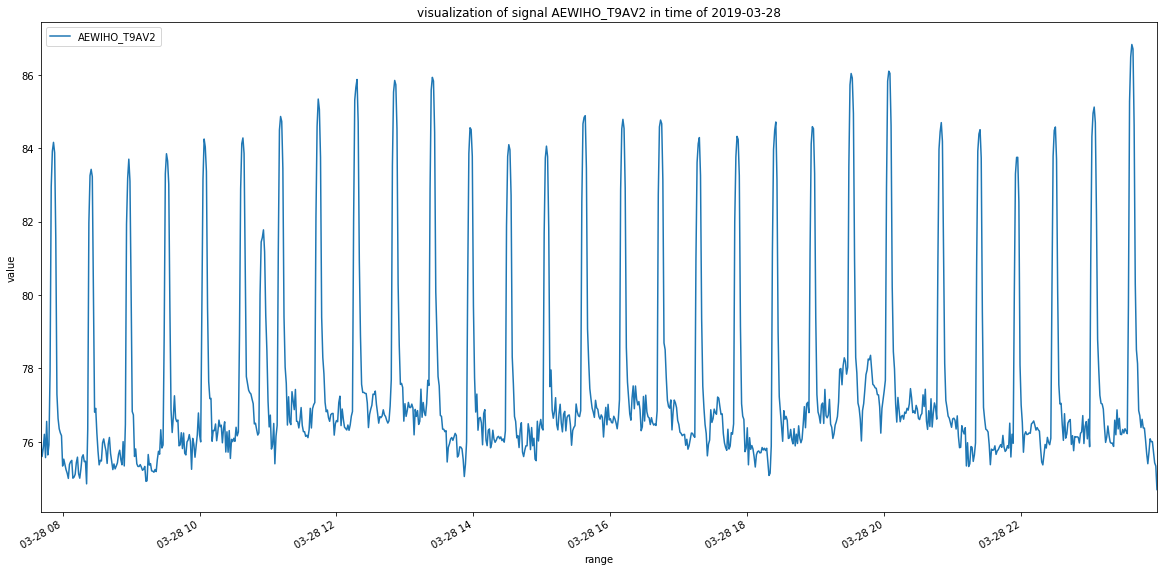

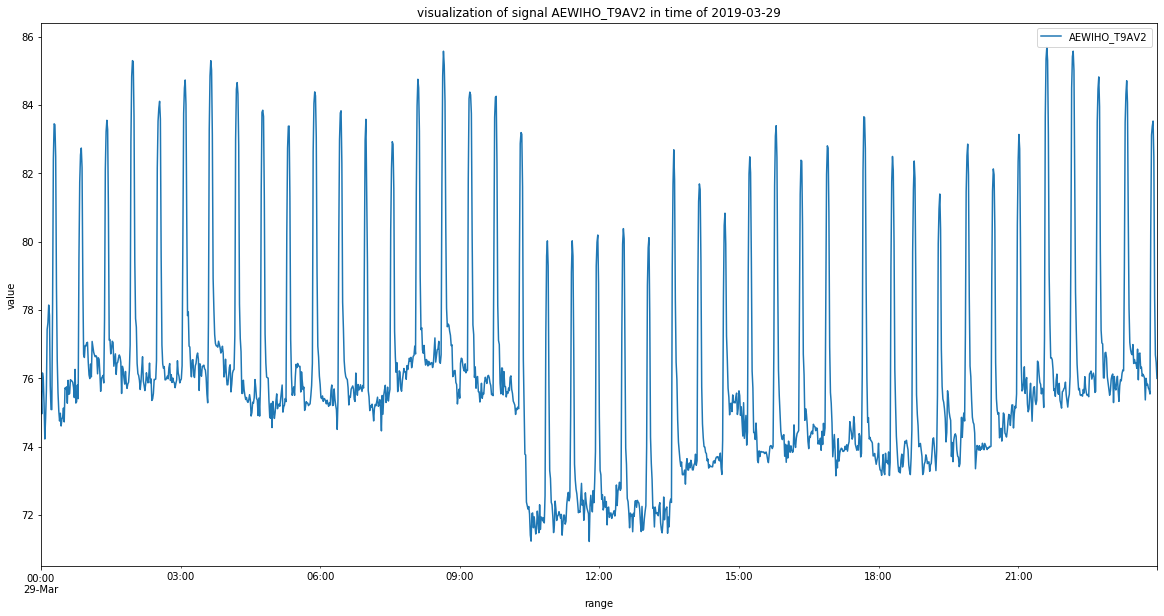

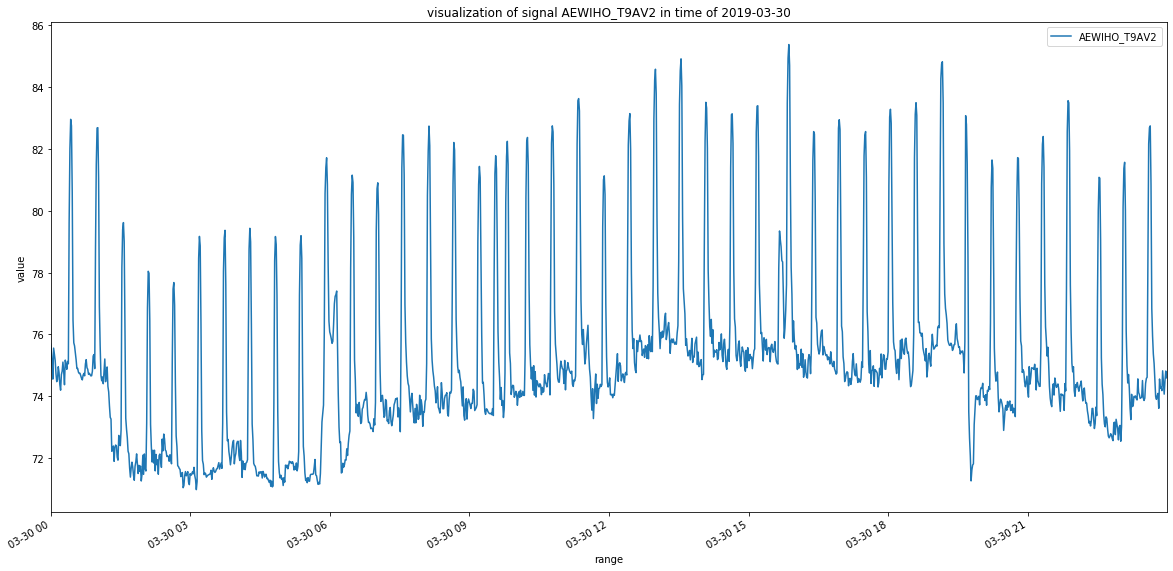

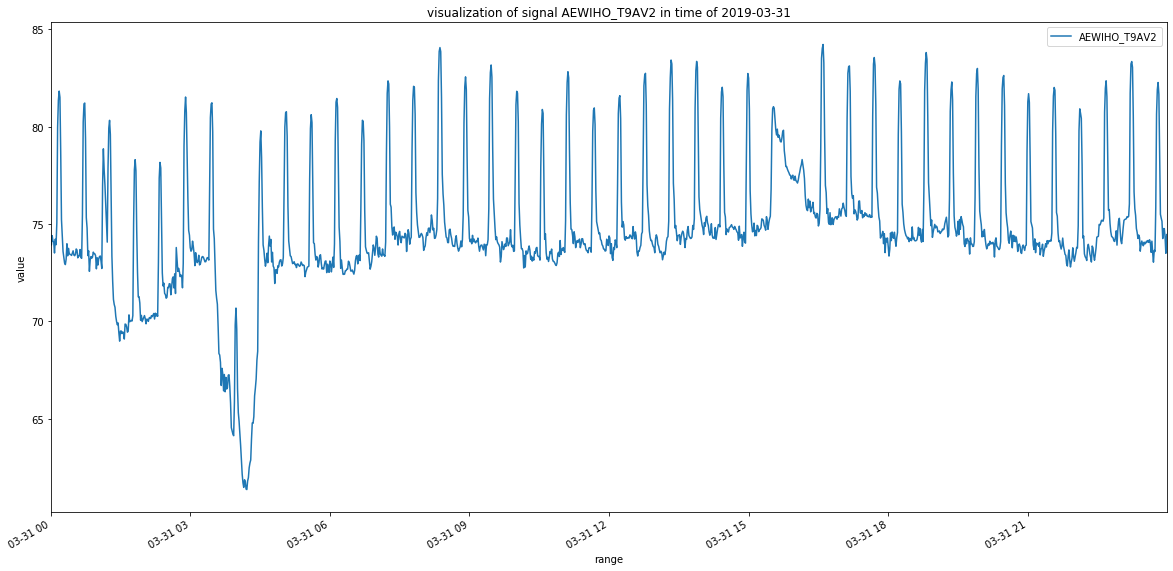

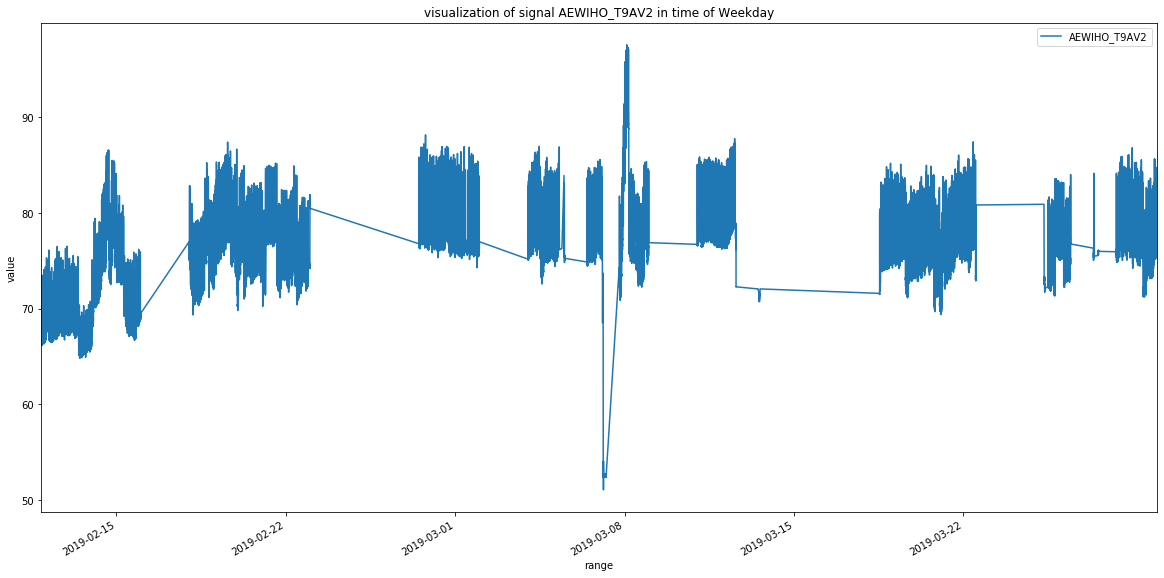

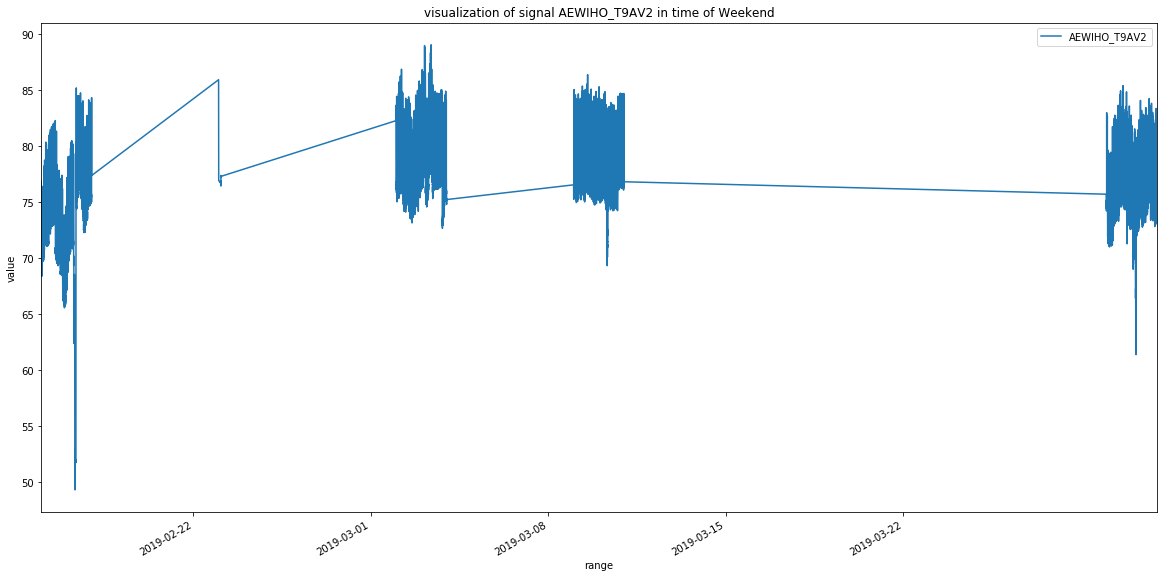

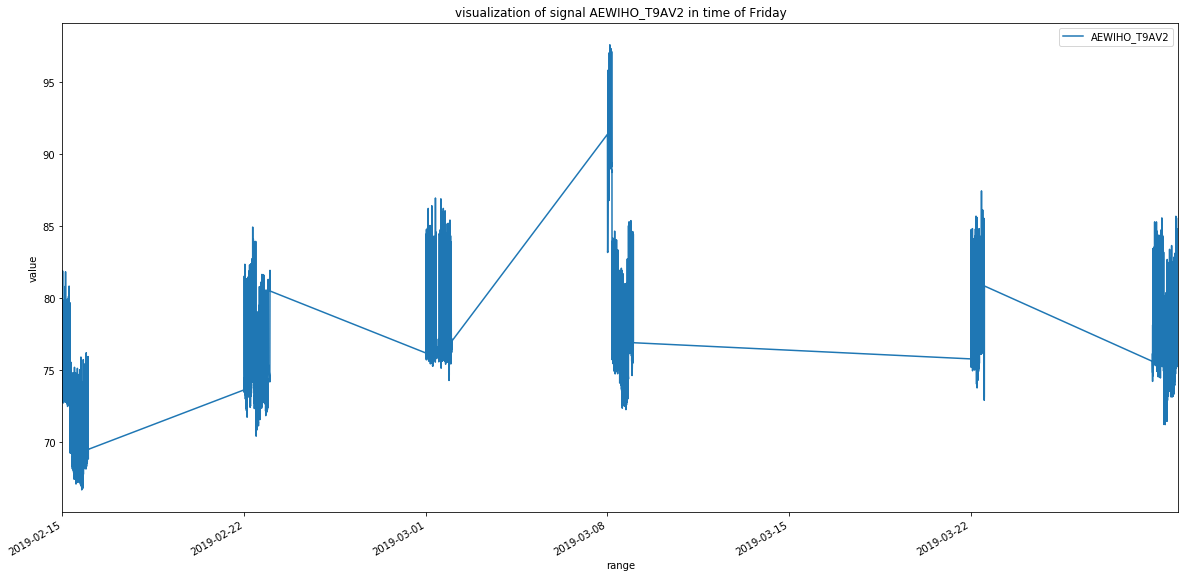

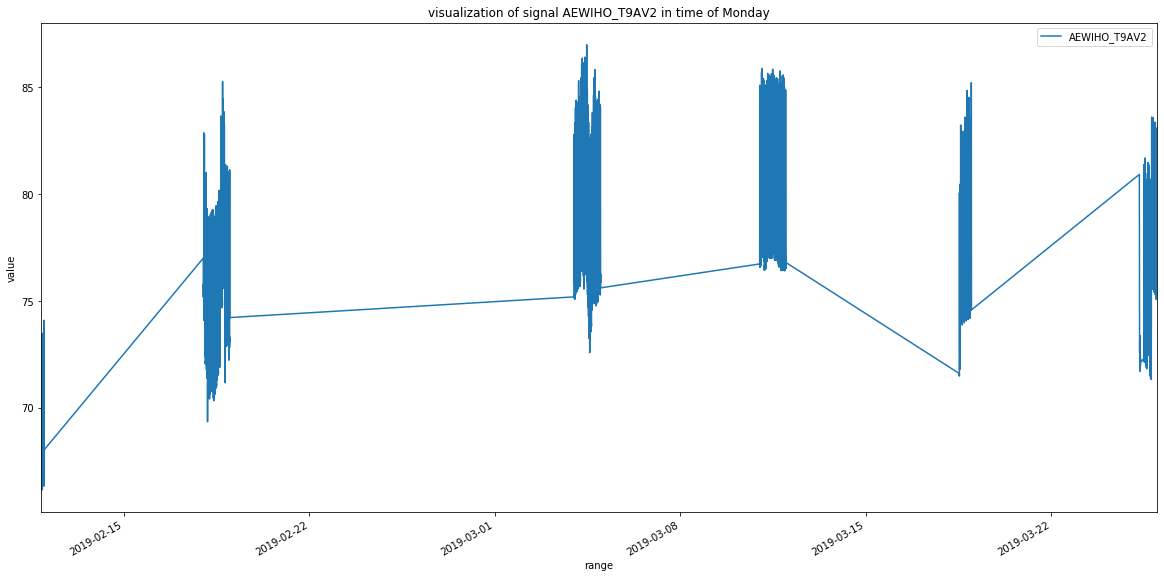

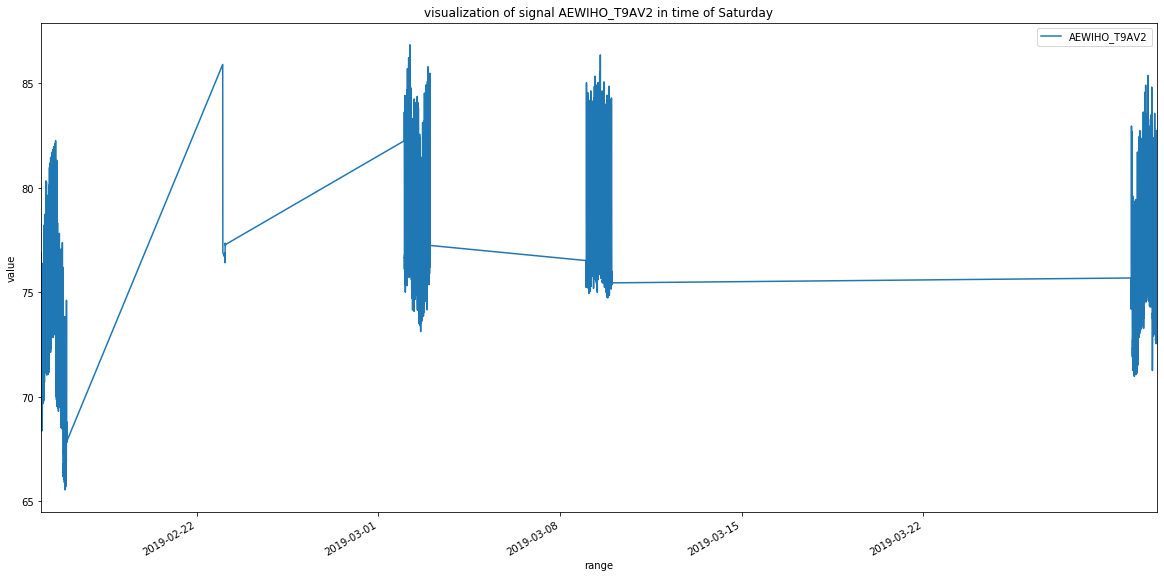

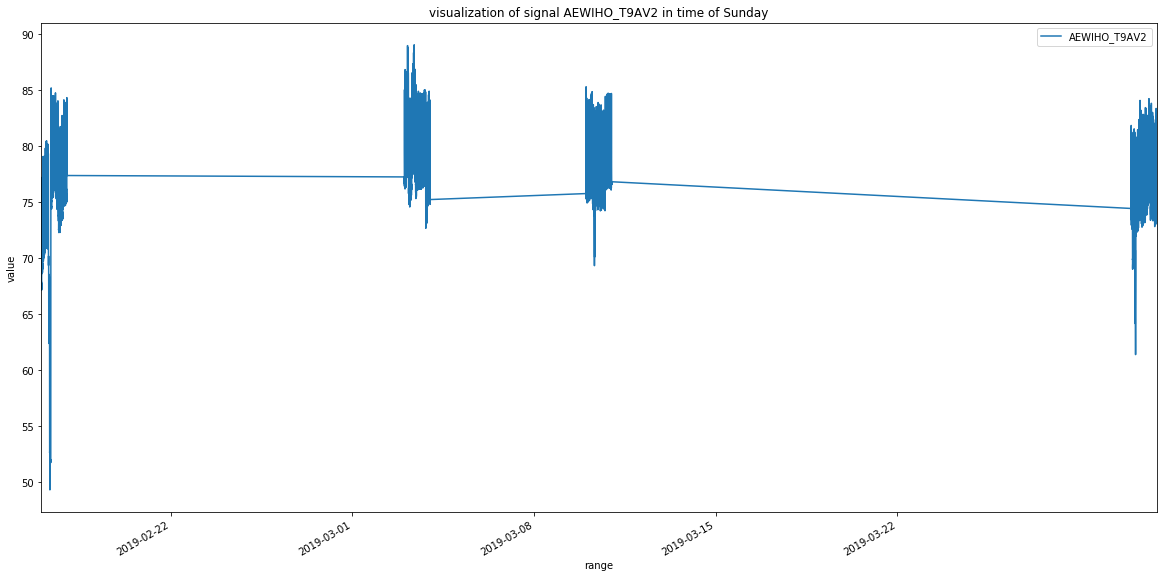

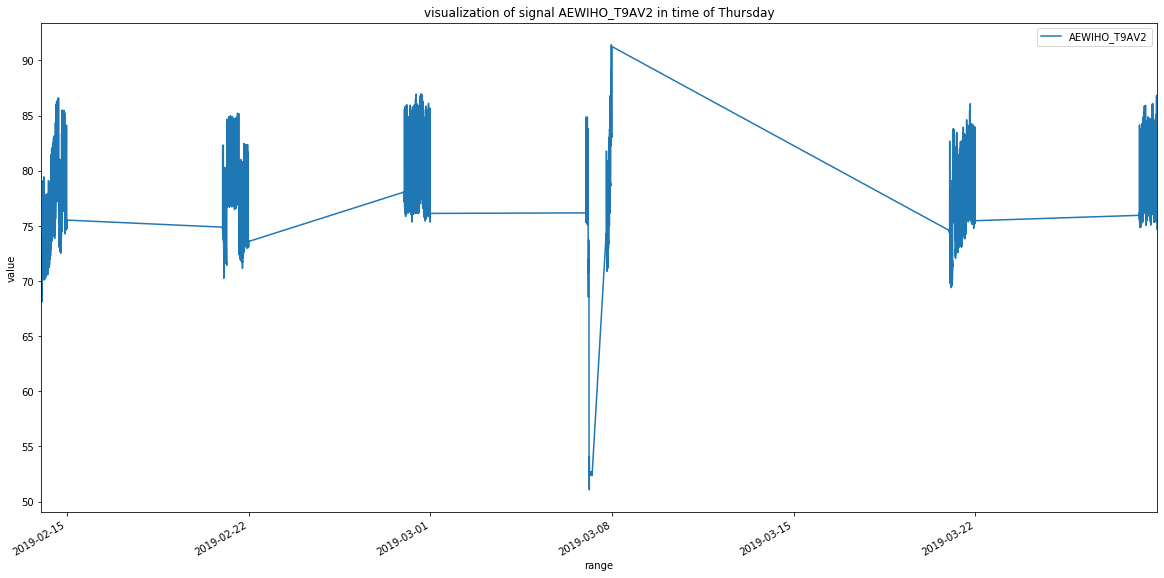

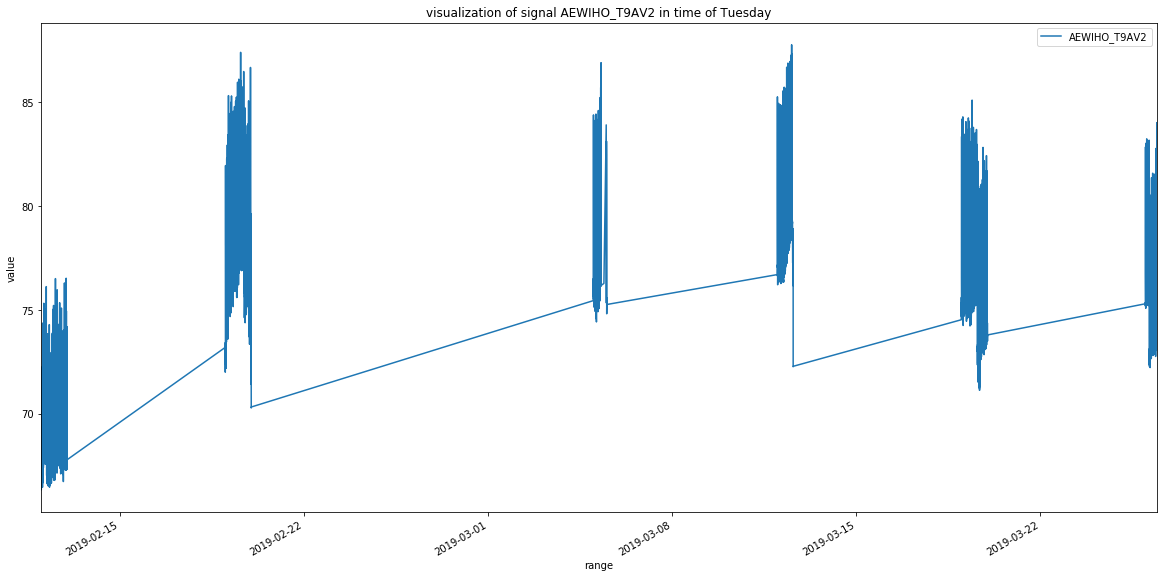

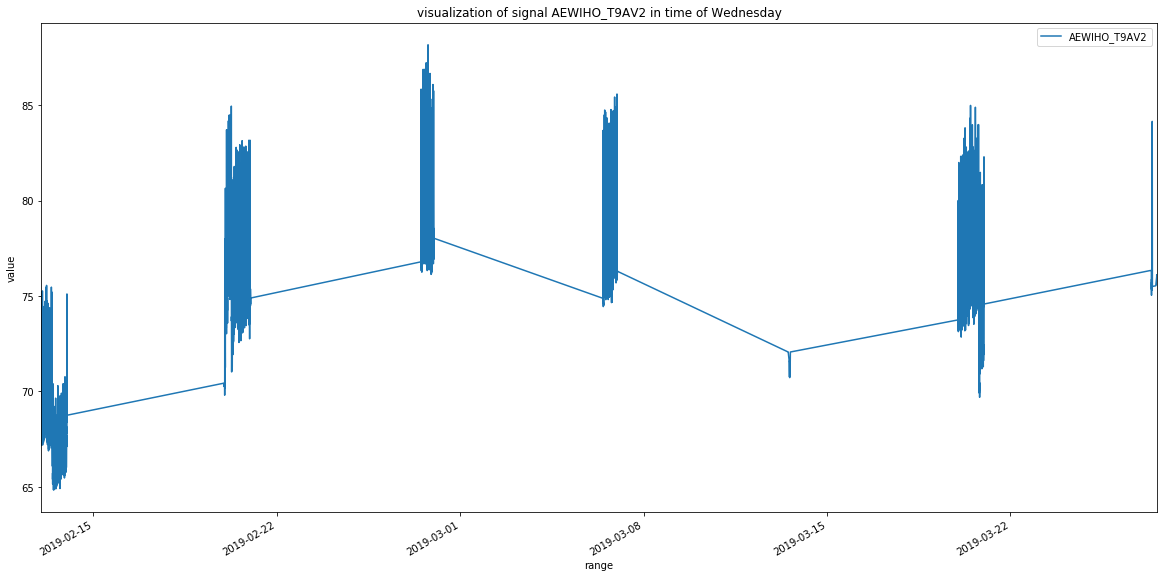

In [60]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = '3_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = '3_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = '3_day_fig_target')

In [61]:
import sklearn

In [62]:
my_model = sklearn.tree.ExtraTreeRegressor()
my_model.fit(train_input, train_output)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [63]:
my_pred = my_model.predict(test_input)

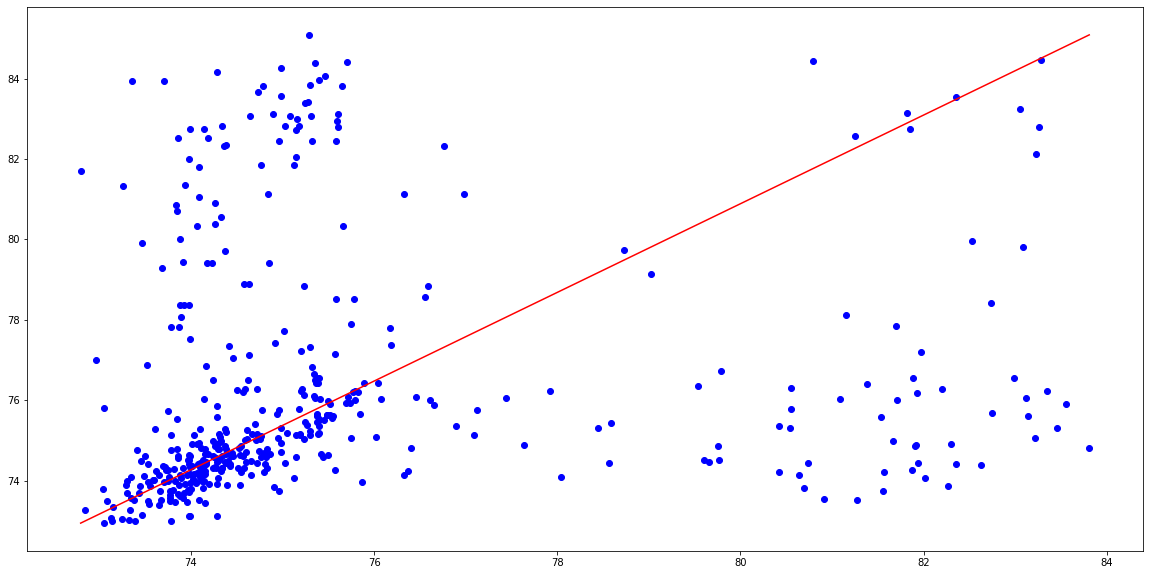

In [64]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

In [65]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_output,my_pred))
RMSE=math.sqrt(mean_squared_error(test_output,my_pred))
print('RMSE: ',RMSE)

r_2 statistic: -1.06
Mean_absolute_error: 2.39
Mean squared error: 14.23
RMSE:  3.7719265175089767


In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

Using TensorFlow backend.
/home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/atif/iai_ml_venv/lib/python3.6/site-packages/tenso

In [67]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

W0828 12:10:55.339005 140550153295680 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:64: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 12:10:55.358654 140550153295680 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:497: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 12:10:55.364125 140550153295680 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3613: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0828 12:10:55.403353 140550153295680 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3636: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,529
Trainable params: 166,529
Non-trainable params: 0
_________________________________________________________________


In [68]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

W0828 12:10:55.539221 140550153295680 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:958: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0828 12:10:55.548022 140550153295680 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:680: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/30
43752/43752 [==============================] - 5s 119us/step - loss: 3.1067 - mean_absolute_error: 3.1067 - acc: 0.0000e+00
Epoch 2/30
43752/43752 [==============================] - 5s 115us/step - loss: 2.4978 - mean_absolute_error: 2.4978 - acc: 0.0000e+00
Epoch 3/30
43752/43752 [==============================] - 5s 117us/step - loss: 2.3950 - mean_absolute_error: 2.3950 - acc: 0.0000e+00
Epoch 4/30
43752/43752 [==============================] - 5s 116us/step - loss: 2.2545 - mean_absolute_error: 2.2545 - acc: 0.0000e+00
Epoch 5/30
43752/43752 [==============================] - 5s 116us/step - loss: 2.1057 - mean_absolute_error: 2.1057 - acc: 0.0000e+00
Epoch 6/30
43752/43752 [==============================] - 5s 115us/step - loss: 2.1171 - mean_absolute_error: 2.1171 - acc: 0.0000e+00
Epoch 7/30
43752/43752 [==============================] - 5s 112us/step - loss: 2.0715 - mean_absolute_error: 2.0715 - acc: 0.0000e+00
Epoch 8/30
43752/43752 [==============================]

In [69]:
predicted_output = NN_model.predict(test_input)

In [70]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: -0.06
Mean_absolute_error: 1.29
Mean squared error: 7.33
RMSE:  2.7069083214443417


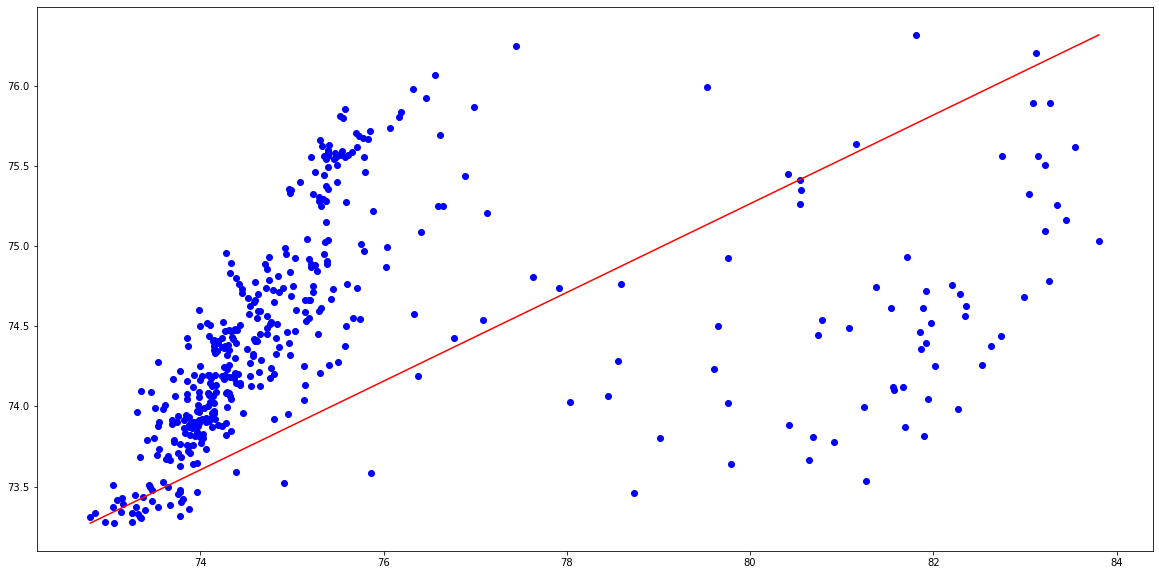

In [71]:
plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
plt.scatter(test_output, predicted_output, color='blue')

# LSTM

In [72]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import callbacks

In [74]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.99)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    multiple_ip_train_data = dataset[0:NumberOfElements]
    multiple_ip_test_set = dataset[NumberOfElements:len(dataset)]
    
    return multiple_ip_train_data, multiple_ip_test_set

multiple_ip_train_data, multiple_ip_test_set = make_dataset(dataframe_high_correlation)

print('train_data_conv shape: ', multiple_ip_train_data.shape)
print('test_data_conv shape: ', multiple_ip_test_set.shape)

dataset length:  44194
Number of Elements for training:  43752
train_data_conv shape:  (43752, 13)
test_data_conv shape:  (442, 13)


In [75]:
 # split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_1 = 2
# split into samples
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, n_steps_1)

print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

X_Conv_Lstm shape:  (43750, 2, 12) 	X_Conv_Lstm size:  1050000 	X_Conv_Lstm dimension:  3
y_Conv_Lstm shape:  (43750,)  size:  43750  dim:  1


In [76]:
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]

samples = X_Conv_Lstm.shape[0]
time = n_steps_1
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [77]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

X_Conv_Lstm shape:  (43750, 2, 12) 	X_Conv_Lstm size:  1050000 	X_Conv_Lstm dimension:  3
X_Conv_Lstm_train shape:  (43750, 2, 1, 12, 1) 	X_Conv_Lstm_train size:  1050000 	X_Conv_Lstm_train dimension:  5


In [78]:
# define model

# cbks = [callbacks.LearningRateScheduler(lambda x: 1. / (1. + x))]

lr = 0.01

def lr_schedule(epoch):
#     print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
#     print('now lr_1: ', lr_1)
    return lr_1

batch_size=32
epochs= 30
activation_function = 'relu'

In [80]:
model = Sequential()
# n_seq, 1, n_steps_2, n_features
model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function), input_shape=(time,rows,cols,channels),return_sequences=False))
# model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [81]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1,
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

W0828 12:20:56.517279 140550153295680 deprecation.py:323] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
43750/43750 [==============================] - 8s 184us/step - loss: 25.3711 - acc: 0.0000e+00
Epoch 2/30
43750/43750 [==============================] - 8s 176us/step - loss: 10.0150 - acc: 0.0000e+00
Epoch 3/30
43750/43750 [==============================] - 8s 176us/step - loss: 9.6738 - acc: 0.0000e+00
Epoch 4/30
43750/43750 [==============================] - 8s 176us/step - loss: 9.4114 - acc: 0.0000e+00
Epoch 5/30
43750/43750 [==============================] - 8s 175us/step - loss: 9.1229 - acc: 0.0000e+00
Epoch 6/30
43750/43750 [==============================] - 8s 175us/step - loss: 9.2020 - acc: 0.0000e+00
Epoch 7/30
43750/43750 [==============================] - 8s 175us/step - loss: 9.0450 - acc: 0.0000e+00
Epoch 8/30
43750/43750 [==============================] - 8s 175us/step - loss: 9.1449 - acc: 0.0000e+00
Epoch 9/30
43750/43750 [==============================] - 8s 175us/step - loss: 9.0377 - acc: 0.0000e+00
Epoch 10/30
43750/43750 [============================

In [82]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

X_Conv_Lstm_test shape:  (440, 2, 12) 	 X_Conv_Lstm_test dimension:  3


In [83]:
from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/conv_LSTM_norm_100.h5')

yhat = model.predict(x_input, verbose=1)
# print(yhat)

440/440 [==============================] - 0s 261us/step


In [84]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(y_Conv_Lstm_test,yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_Conv_Lstm_test,yhat))
print("Mean squared error: %.2f" % mean_squared_error(y_Conv_Lstm_test,yhat))
RMSE=math.sqrt(mean_squared_error(y_Conv_Lstm_test,yhat))
print('RMSE: ',RMSE)

r_2 statistic: 0.04
Mean_absolute_error: 2.13
Mean squared error: 6.50
RMSE:  2.5504845494548976


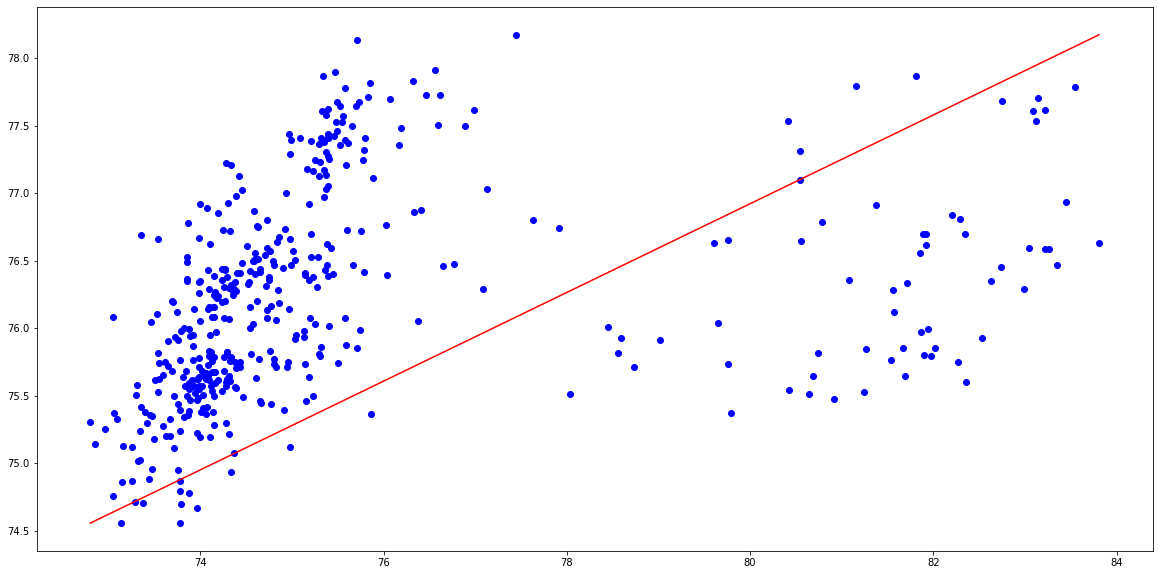

In [85]:
plt.plot((min(y_Conv_Lstm_test), max(y_Conv_Lstm_test)), (min(yhat), max(yhat)), color='red')
plt.scatter(y_Conv_Lstm_test, yhat, color='blue')

In [ ]:
dataframe_datetime.tail()

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)